<h1 align="center">EDA TRAFFIC CRASHES</h1>

<div style="text-align:center">
<img src="https://i.ibb.co/J1mbwbk/221124014742-01-chicago-crash-112322-restricted.jpg" alt="hit-and-run" border="0">
</div>

In this Jupyter Notebook, we'll analyze the data from Traffic Crashes in Chicago to discover insights and behavior patterns of the crashes, context and environment of the events. Subsequently, using the cleaned data, we can apply a machine learning model to classify incidents with common features (supervised learning).

### IMPORTING LIBRARIES

We’ll import the necessary libraries for the analysis:

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

### DEFINING VISUALIZATION VALUES

Next, let’s define the values that will affect the visualization options:

In [2]:
warnings.filterwarnings('ignore')

Mute the warnings in the output:

In [3]:
pd.set_option("display.max_columns", None)

Set the seaborn styles for the plots:

In [4]:
sns.set_style("darkgrid")
colors_arbitrary = sns.color_palette("Set2",2)
colors_arbitrary_1 = sns.color_palette("Paired")
colors_arbitrary_2 = sns.color_palette("Pastel1")
colors_arbitrary_3 = sns.color_palette("Spectral")

Let's read the data:

In [5]:
project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(project_dir, "data", "raw")
os.makedirs(data_dir, exist_ok=True)

output_path = os.path.join(data_dir,'modified_traffic_crashes.csv')
df=pd.read_csv(output_path)
df.head(5)

POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE        DEVICE_CONDITION  \
0                  30         TRAFFIC SIGNAL    FUNCTIONING PROPERLY   
1                  30            NO CONTROLS             NO CONTROLS   
2                  10            NO CONTROLS             NO CONTROLS   
3                  15            NO CONTROLS             NO CONTROLS   
4                  30         TRAFFIC SIGNAL  FUNCTIONING IMPROPERLY   

  WEATHER_CONDITION LIGHTING_CONDITION      FIRST_CRASH_TYPE  \
0             CLEAR           DAYLIGHT  PARKED MOTOR VEHICLE   
1             CLEAR           DAYLIGHT          PEDALCYCLIST   
2     OTHER/UNKNOWN      OTHER/UNKNOWN                 ANGLE   
3             CLEAR           DAYLIGHT          REAR TO SIDE   
4             CLEAR           DAYLIGHT                 ANGLE   

                   TRAFFICWAY_TYPE           ALIGNMENT ROADWAY_SURFACE_COND  \
0  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL                  DRY   
1                      NOT DIVIDED  STRAIGHT AND LEVEL                  DRY   
2                      PARKING LOT  STRAIGHT AND LEVEL        OTHER/UNKNOWN   
3                      PARKING LOT  STRAIGHT AND LEVEL                  DRY   
4                         FOUR WAY  STRAIGHT AND LEVEL                  DRY   

     ROAD_DEFECT                 REPORT_TYPE  \
0     NO DEFECTS                    ON SCENE   
1     NO DEFECTS                    ON SCENE   
2  OTHER/UNKNOWN  NOT ON SCENE (DESK REPORT)   
3     NO DEFECTS  NOT ON SCENE (DESK REPORT)   
4     NO DEFECTS                    ON SCENE   

                         CRASH_TYPE HIT_AND_RUN_I         DAMAGE  \
0            NO INJURY / DRIVE AWAY             Y    OVER $1,500   
1  INJURY AND / OR TOW DUE TO CRASH            DA  $501 - $1,500   
2            NO INJURY / DRIVE AWAY             Y  $501 - $1,500   
3            NO INJURY / DRIVE AWAY             Y    OVER $1,500   
4  INJURY AND / OR TOW DUE TO CRASH            DA    OVER $1,500   

                  PRIM_CONTRIBUTORY_CAUSE  \
0  FAILING TO REDUCE SPEED TO AVOID CRASH   
1  FAILING TO REDUCE SPEED TO AVOID CRASH   
2                     UNABLE TO DETERMINE   
3                        IMPROPER BACKING   
4                     UNABLE TO DETERMINE   

                              SEC_CONTRIBUTORY_CAUSE  NUM_UNITS  \
0  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...          4   
1                                UNABLE TO DETERMINE          2   
2                                     NOT APPLICABLE          2   
3                                     NOT APPLICABLE          2   
4                                UNABLE TO DETERMINE          2   

         MOST_SEVERE_INJURY  INJURIES_TOTAL  INJURIES_FATAL  \
0   NO INDICATION OF INJURY             0.0             0.0   
1  NONINCAPACITATING INJURY             1.0             0.0   
2   NO INDICATION OF INJURY             0.0             0.0   
3   NO INDICATION OF INJURY             0.0             0.0   
4  NONINCAPACITATING INJURY             5.0             0.0   

   INJURIES_INCAPACITATING  INJURIES_NON_INCAPACITATING  \
0                      0.0                          0.0   
1                      0.0                          1.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          5.0   

   INJURIES_REPORTED_NOT_EVIDENT  INJURIES_NO_INDICATION  CRASH_HOUR  \
0                            0.0                     1.0          14   
1                            0.0                     1.0          17   
2                            0.0                     2.0          14   
3                            0.0                     2.0          12   
4                            0.0                     0.0          19   

   CRASH_DAY_OF_WEEK  CRASH_MONTH   LATITUDE  LONGITUDE  CRASH_YEAR  \
0                  7            7  41.854120 -87.665902        2023   
1                  6         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862214 entries, 0 to 862213
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   POSTED_SPEED_LIMIT             862214 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE         862214 non-null  object 
 2   DEVICE_CONDITION               862214 non-null  object 
 3   WEATHER_CONDITION              862214 non-null  object 
 4   LIGHTING_CONDITION             862214 non-null  object 
 5   FIRST_CRASH_TYPE               862214 non-null  object 
 6   TRAFFICWAY_TYPE                862214 non-null  object 
 7   ALIGNMENT                      862214 non-null  object 
 8   ROADWAY_SURFACE_COND           862214 non-null  object 
 9   ROAD_DEFECT                    862214 non-null  object 
 10  REPORT_TYPE                    862214 non-null  object 
 11  CRASH_TYPE                     862214 non-null  object 
 12  HIT_AND_RUN_I                 

In [7]:
df.shape

(862214, 33)

### STADISTICAL ANALYSIS

Let’s see some statistical data from non-categorical and categorical variables.

In [8]:
df.describe()

POSTED_SPEED_LIMIT      NUM_UNITS  INJURIES_TOTAL  INJURIES_FATAL  \
count       862214.000000  862214.000000   862214.000000   862214.000000   
mean            28.679111       2.032138        0.188681        0.000952   
std              5.483201       0.440970        0.560813        0.033337   
min              5.000000       1.000000        0.000000        0.000000   
25%             30.000000       2.000000        0.000000        0.000000   
50%             30.000000       2.000000        0.000000        0.000000   
75%             30.000000       2.000000        0.000000        0.000000   
max             99.000000      18.000000       21.000000        3.000000   

       INJURIES_INCAPACITATING  INJURIES_NON_INCAPACITATING  \
count            862214.000000                862214.000000   
mean                  0.018833                     0.105814   
std                   0.159846                     0.417468   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   0.000000                     0.000000   
75%                   0.000000                     0.000000   
max                  10.000000                    21.000000   

       INJURIES_REPORTED_NOT_EVIDENT  INJURIES_NO_INDICATION     CRASH_HOUR  \
count                  862214.000000           862214.000000  862214.000000   
mean                        0.063082                1.999952      13.215260   
std                         0.321552                1.154966       5.559624   
min                         0.000000                0.000000       0.000000   
25%                         0.000000                1.000000       9.000000   
50%                         0.000000                2.000000      14.000000   
75%                         0.000000                2.000000      17.000000   
max                        15.000000               61.000000      23.000000   

       CRASH_DAY_OF_WEEK    CRASH_MONTH       LATITUDE      LONGITUDE  \
count      862214.000000  862214.000000  862214.000000  862214.000000   
mean            4.121558       6.771502      41.855551     -87.674033   
std             1.979144       3.396483       0.330184       0.670273   
min             1.000000       1.000000       0.000000     -87.936193   
25%             2.000000       4.000000      41.783889     -87.721963   
50%             4.000000       7.000000      41.875155     -87.674494   
75%             6.000000      10.000000      41.924770     -87.633827   
max             7.000000      12.000000      42.022780       0.000000   

          CRASH_YEAR  MONTH_POLICE_NOTIFIED  DAY_POLICE_NOTIFIED  \
count  862214.000000          862214.000000        862214.000000   
mean     2020.291552               6.770804            15.685996   
std         2.471469               3.397143             8.786039   
min      2015.000000               1.000000             1.000000   
25%      2018.000000               4.000000             8.000000   
50%      2020.000000               7.000000            16.000000   
75%      2022.000000              10.000000            23.000000   
max      2024.000000              12.000000            31.000000   

       YEAR_POLICE_NOTIFIED  
count         862214.000000  
mean            2020.293287  
std                2.471477  
min             2015.000000  
25%             2018.000000  
50%             2020.000000  
75%             2022.000000  
max             2025.000000

There are some interesting findings here:

* Crashes occurred at low posted speed limits, this means that it's not necessary to drive at high speed to have a traffic crash.

* The number of units is typically two, which means either: those affected were the driver and the car, or two people (or other living beings) were involved.


* Most cases show few injuries, and in some cases there are no injuries, probably indicating more material damage than human harm."

In [9]:
df.describe(include=object)

TRAFFIC_CONTROL_DEVICE DEVICE_CONDITION WEATHER_CONDITION  \
count                  862214           862214            862214   
unique                     18                7                11   
top               NO CONTROLS      NO CONTROLS             CLEAR   
freq                   486947           492746            677751   

       LIGHTING_CONDITION      FIRST_CRASH_TYPE TRAFFICWAY_TYPE  \
count              862214                862214          862214   
unique                  6                    18              20   
top              DAYLIGHT  PARKED MOTOR VEHICLE     NOT DIVIDED   
freq               553424                199756          374793   

                 ALIGNMENT ROADWAY_SURFACE_COND ROAD_DEFECT  \
count               862214               862214      862214   
unique                   6                    6           6   
top     STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
freq                842304               637348      686077   

                       REPORT_TYPE              CRASH_TYPE HIT_AND_RUN_I  \
count                       862214                  862214        862214   
unique                           3                       2             3   
top     NOT ON SCENE (DESK REPORT)  NO INJURY / DRIVE AWAY            DA   
freq                        485173                  632857        592482   

             DAMAGE PRIM_CONTRIBUTORY_CAUSE SEC_CONTRIBUTORY_CAUSE  \
count        862214                  862214                 862214   
unique            3                      40                     40   
top     OVER $1,500     UNABLE TO DETERMINE         NOT APPLICABLE   
freq         541661                  336886                 355267   

             MOST_SEVERE_INJURY  
count                    862214  
unique                        5  
top     NO INDICATION OF INJURY  
freq                     743539

"Here we have interesting findings:

* There are no traffic control devices in most cases. This is a first indicator.

* It's not necessary to have awful weather, wet surfaces, road defects or night driving to have a crash; most incidents occurred in clear conditions.

* There are several cases of crashes in parking areas.

* We have a second indicator: the type of roadway is "Not Divided".

* The alignment is correct. This doesn't influence the occurrence of crashes.

* The most common crash type is without injury, where subjects drive away.

* Despite the low number of units involved, the damage is over $1,500. This indicates that there are mainly material losses.

Subsequently, we are going to analyze these columns to prove the findings."

Let's see the numerical columns to see if there are any correlation among them:

In [10]:
numerical_col= ['POSTED_SPEED_LIMIT',	'NUM_UNITS',	'INJURIES_TOTAL',	'INJURIES_FATAL', 'INJURIES_INCAPACITATING',	'INJURIES_NON_INCAPACITATING',
                'INJURIES_REPORTED_NOT_EVIDENT',	'INJURIES_NO_INDICATION',	'CRASH_HOUR',	'CRASH_DAY_OF_WEEK',	'CRASH_MONTH',	'LATITUDE',	'LONGITUDE',	'CRASH_YEAR',
                'MONTH_POLICE_NOTIFIED',	'DAY_POLICE_NOTIFIED',	'YEAR_POLICE_NOTIFIED']
df[numerical_col].corr()

POSTED_SPEED_LIMIT  NUM_UNITS  INJURIES_TOTAL  \
POSTED_SPEED_LIMIT                       1.000000   0.046464        0.076236   
NUM_UNITS                                0.046464   1.000000        0.104957   
INJURIES_TOTAL                           0.076236   0.104957        1.000000   
INJURIES_FATAL                           0.006817   0.004072        0.088407   
INJURIES_INCAPACITATING                  0.028619   0.034309        0.327320   
INJURIES_NON_INCAPACITATING              0.056807   0.080251        0.763771   
INJURIES_REPORTED_NOT_EVIDENT            0.044277   0.061387        0.580607   
INJURIES_NO_INDICATION                   0.107375   0.171419       -0.188058   
CRASH_HOUR                               0.010121   0.006808        0.001739   
CRASH_DAY_OF_WEEK                        0.008663   0.000624       -0.005671   
CRASH_MONTH                              0.010000   0.009632        0.012475   
LATITUDE                                -0.005647   0.003657       -0.013387   
LONGITUDE                                0.007446  -0.002971        0.002796   
CRASH_YEAR                              -0.009700   0.007465        0.044439   
MONTH_POLICE_NOTIFIED                    0.010292   0.009581        0.012543   
DAY_POLICE_NOTIFIED                      0.003168  -0.000758       -0.001069   
YEAR_POLICE_NOTIFIED                    -0.009857   0.007262        0.044290   

                               INJURIES_FATAL  INJURIES_INCAPACITATING  \
POSTED_SPEED_LIMIT                   0.006817                 0.028619   
NUM_UNITS                            0.004072                 0.034309   
INJURIES_TOTAL                       0.088407                 0.327320   
INJURIES_FATAL                       1.000000                 0.046259   
INJURIES_INCAPACITATING              0.046259                 1.000000   
INJURIES_NON_INCAPACITATING          0.019928                 0.048818   
INJURIES_REPORTED_NOT_EVIDENT        0.001646                 0.005589   
INJURIES_NO_INDICATION              -0.028645                -0.082217   
CRASH_HOUR                          -0.004917                -0.005909   
CRASH_DAY_OF_WEEK                   -0.002721                -0.002940   
CRASH_MONTH                          0.001071                 0.004154   
LATITUDE                            -0.002786                -0.002023   
LONGITUDE                            0.000264                -0.000517   
CRASH_YEAR                           0.004035                 0.005002   
MONTH_POLICE_NOTIFIED                0.001118                 0.004235   
DAY_POLICE_NOTIFIED                 -0.000104                -0.000753   
YEAR_POLICE_NOTIFIED                 0.004015                 0.004949   

                               INJURIES_NON_INCAPACITATING  \
POSTED_SPEED_LIMIT                                0.056807   
NUM_UNITS                                         0.080251   
INJURIES_TOTAL                                    0.763771   
INJURIES_FATAL                                    0.019928   
INJURIES_INCAPACITATING                           0.048818   
INJURIES_NON_INCAPACITATING                       1.000000   
INJURIES_REPORTED_NOT_EVIDENT                     0.007455   
INJURIES_NO_INDICATION                           -0.152811   
CRASH_HOUR                                        0.000486   
CRASH_DAY_OF_WEEK                                -0.005962   
CRASH_MONTH                                       0.009604   
LATITUDE                                         -0.009141   
LONGITUDE                                         0.001308   
CRASH_YEAR                                        0.036697   
MONTH_POLICE_NOTIFIED                             0.009667   
DAY_POLICE_NOTIFIED                              -0.000596   
YEAR_POLICE_NOTIFIED                              0.036575   

                               INJURIES_REPORTED_NOT_EVIDENT  \
POSTED_SPEED_LIMIT                                  0.044277   
NUM_UNITS   

There are some correlations between Injuries columns, and strong correlations between crash date columns and police notification date columns. These are obvious, and we don't see any other relevant correlations.

### DATA VISUALIZATION

Let’s explore some graphical representations of the values in order to discover insights:

#### POSTED SPEED LIMIT DISTRIBUTION

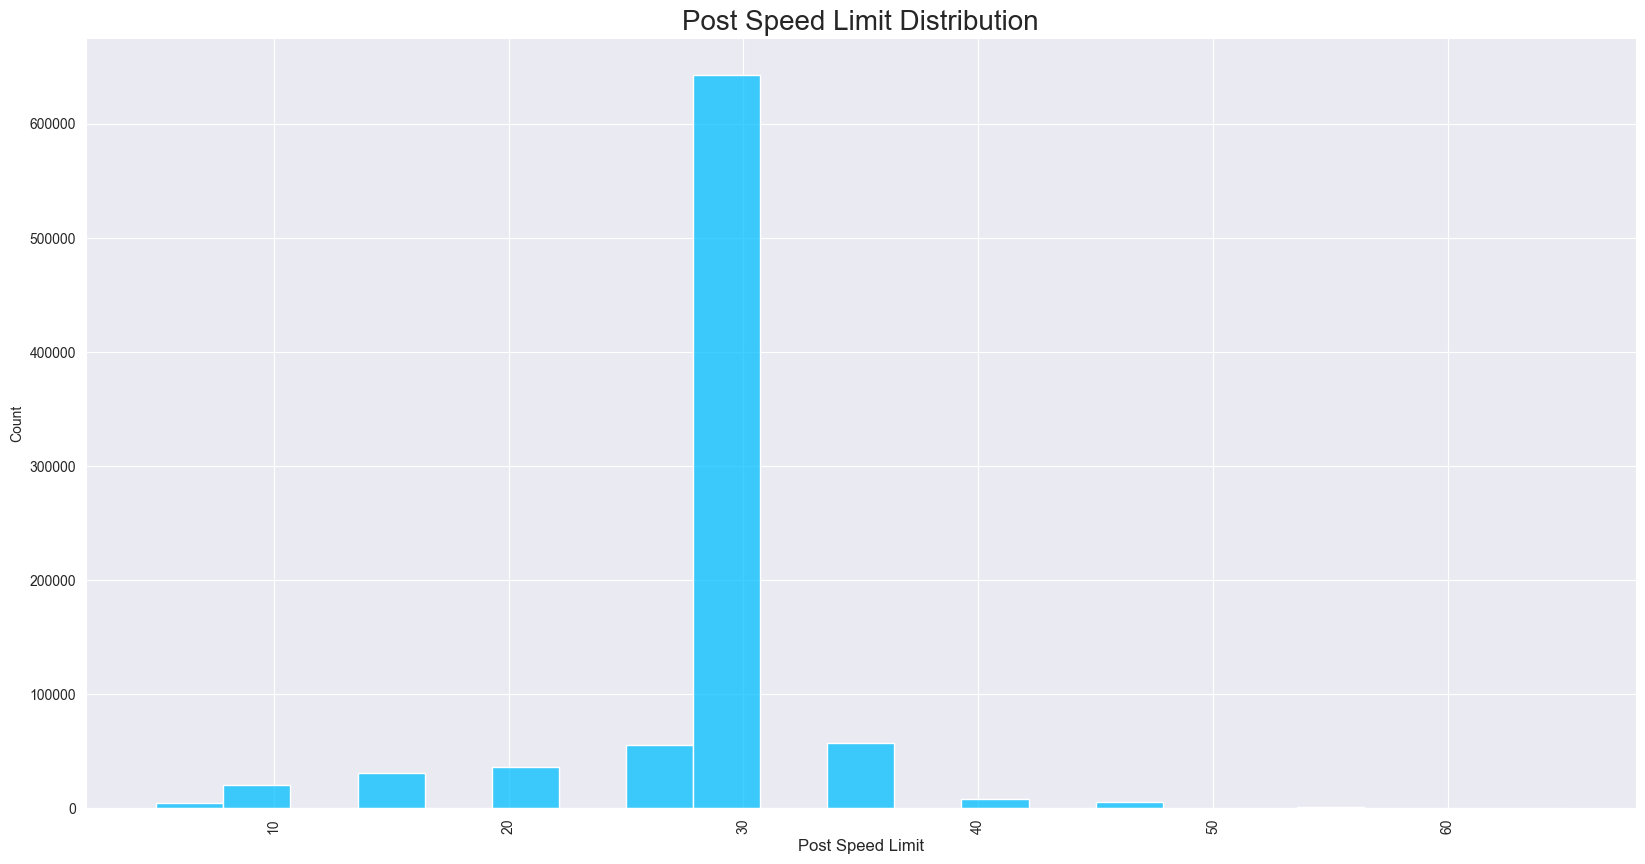

In [11]:
plt.figure(figsize=(20,10))

sns.histplot(df[df["POSTED_SPEED_LIMIT"] < 70], x="POSTED_SPEED_LIMIT", color="deepskyblue")
plt.title("Post Speed Limit Distribution", fontsize=20)
plt.xlabel("Post Speed Limit", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

This confirms the data analysis, there are several crashes in low speed roads/areas such as parking lots. For future ML classification models, we can drop this column because 30 mph is the prominent value and there are no other significant Posted Speed Limits.

#### COUNT OF TRAFFIC CONTROL DEVICE

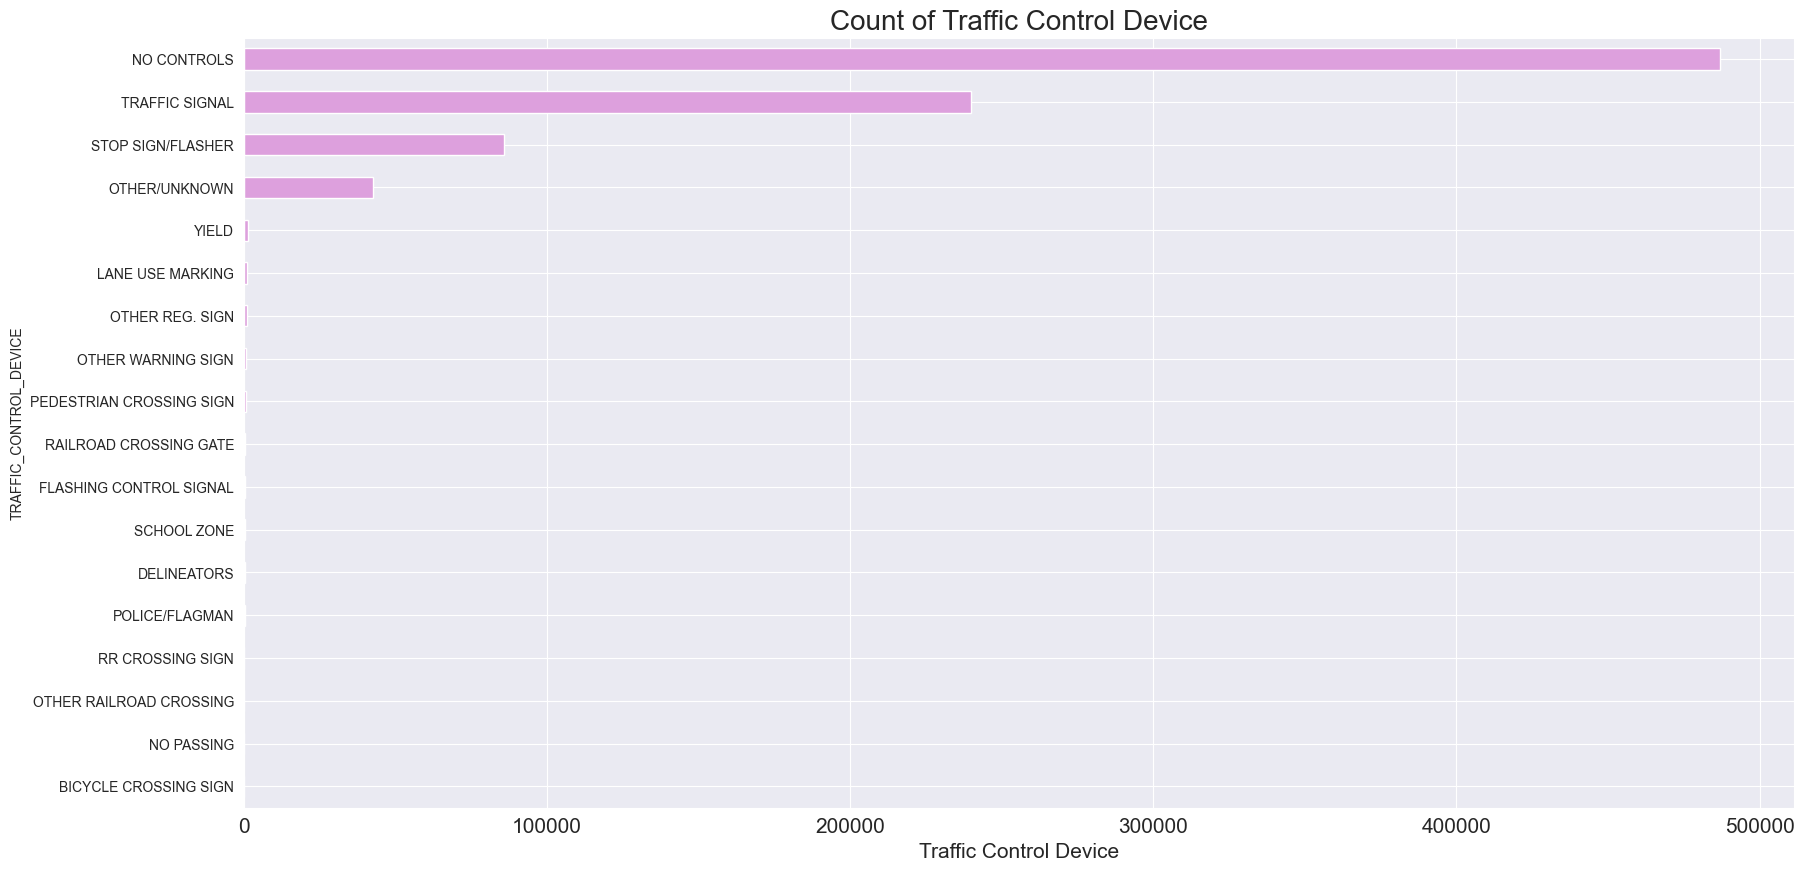

In [12]:
plt.figure(figsize=(20,10))

df["TRAFFIC_CONTROL_DEVICE"].value_counts().sort_values(ascending=True).plot(kind='barh', color = 'plum')

plt.title("Count of Traffic Control Device", fontsize=20)
plt.xlabel("Traffic Control Device", fontsize=15)
plt.xticks(fontsize=15)

plt.show()

Despite 'No Controls' being the most common value, it doesn't guarantee that the presence of controls prevents crash occurrence. On the other hand, maybe the presence of controls near zero helps to prevent accidents.

#### COUNT OF DEVICE CONDITION

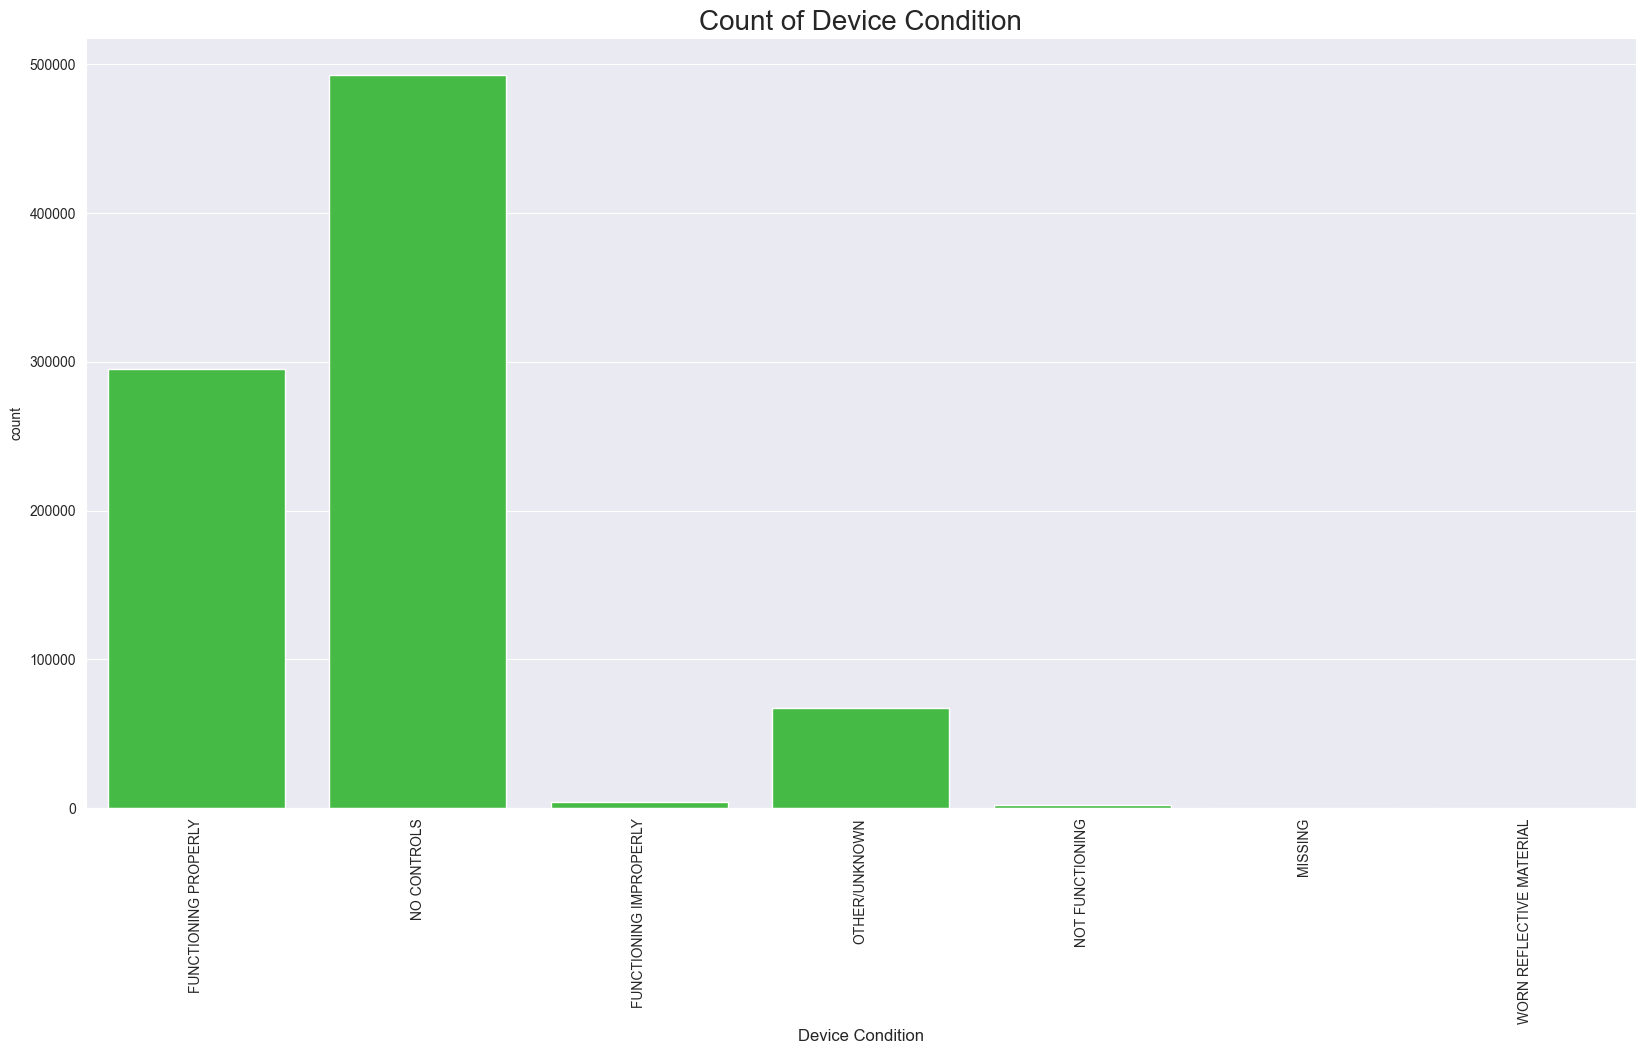

In [13]:
plt.figure(figsize=(20,10))

sns.countplot(df, x="DEVICE_CONDITION", color="limegreen")
plt.title("Count of Device Condition", fontsize=20)
plt.xlabel("Device Condition", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In cases where traffic controls are present, they appear to function properly, suggesting they may have limited influence on crash occurrence.

#### COUNT OF WEATHER_CONDITION

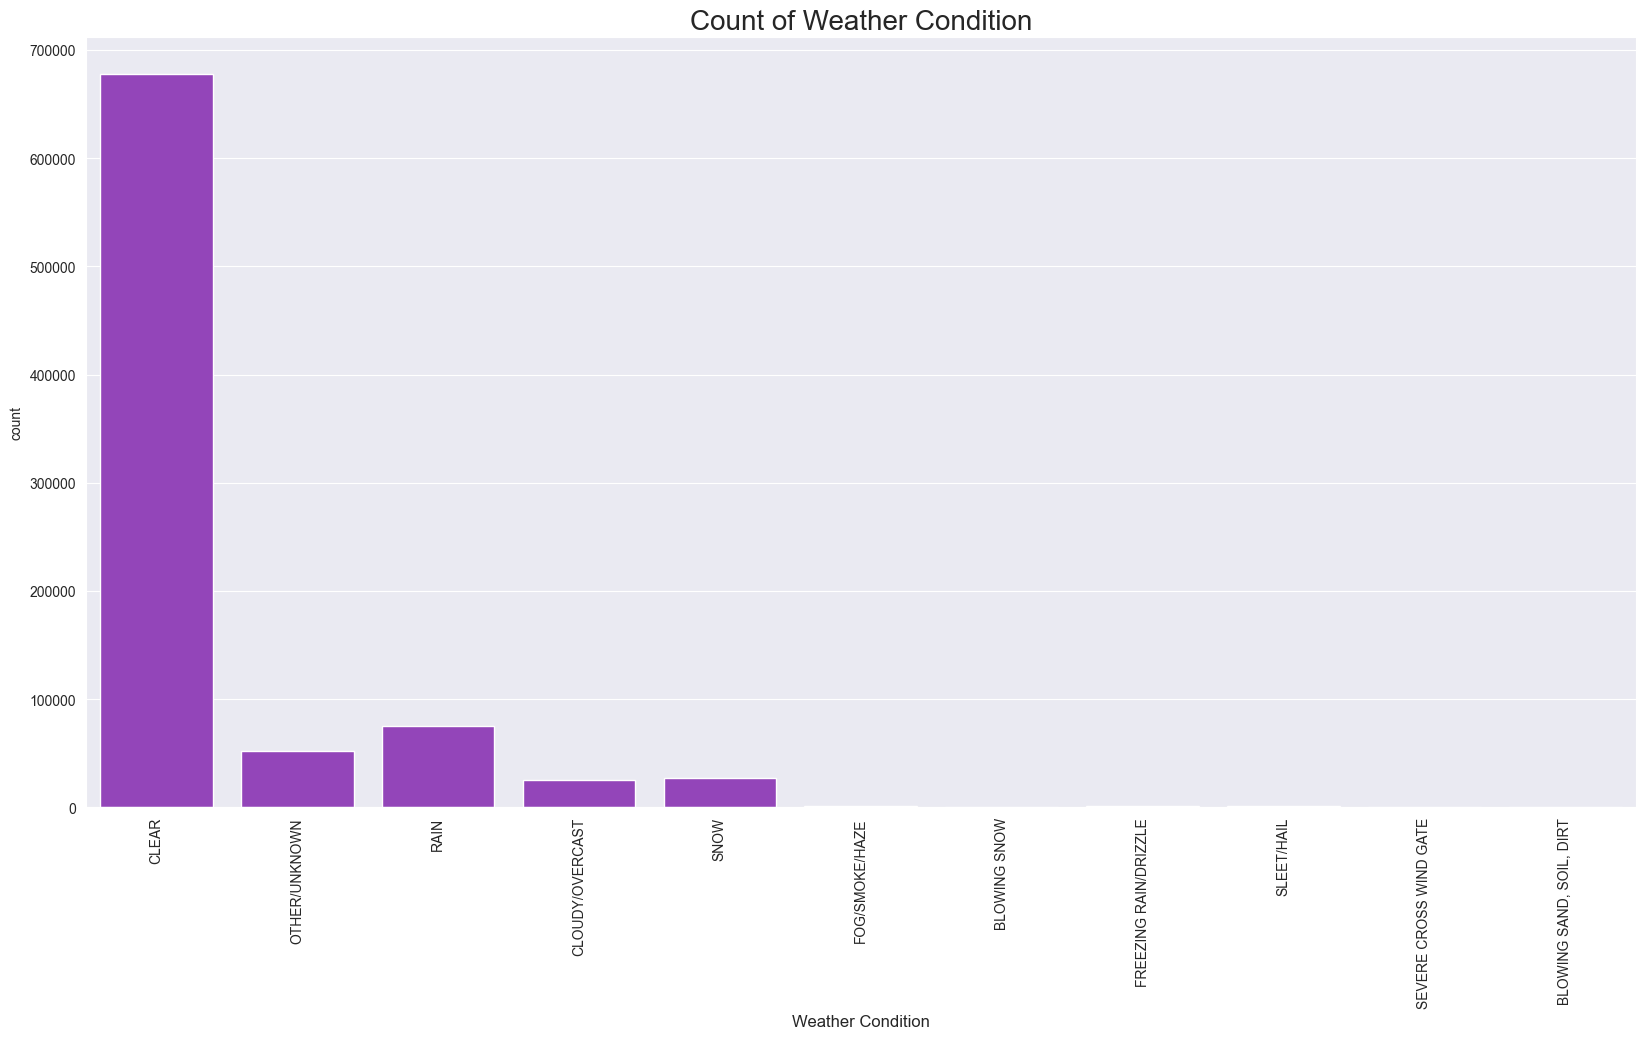

In [14]:
plt.figure(figsize=(20,10))

sns.countplot(df, x="WEATHER_CONDITION", color="darkorchid")
plt.title("Count of Weather Condition", fontsize=20)
plt.xlabel("Weather Condition", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Yes, most crashes occurred in good weather. For future ML classification models, we can drop this column because 'Clear' is the predominant value and there are no other weather conditions

#### LIGHTING CONDITION PERCENTAGE

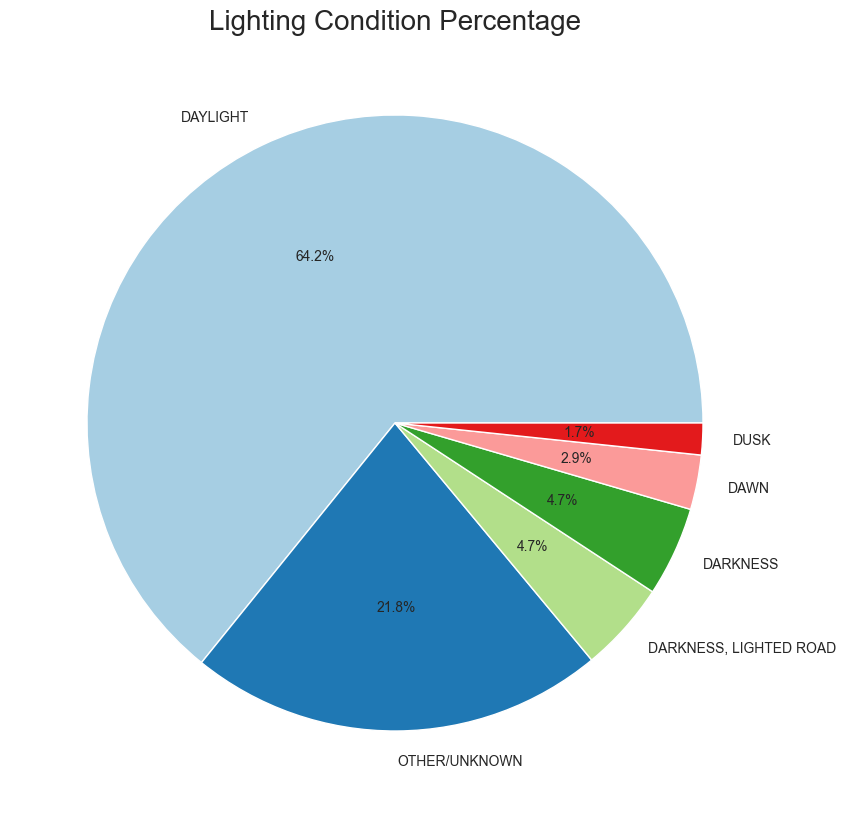

In [15]:
plt.figure(figsize=(10,10))

plt.pie(data=df, x = df["LIGHTING_CONDITION"].value_counts(), labels = df["LIGHTING_CONDITION"].unique(), autopct='%1.1f%%', colors=colors_arbitrary_1)

plt.title("Lighting Condition Percentage", fontsize=20)

plt.show()

Daylight is the prominent value, but there are other unidentified values and, in lower proportions, darkness, dawn and dusk conditions. This data shows us that the lighting condition may have limited impact, and we can drop this column for ML modeling.

#### COUNT OF FIRST CRASH TYPE BY DAMAGE

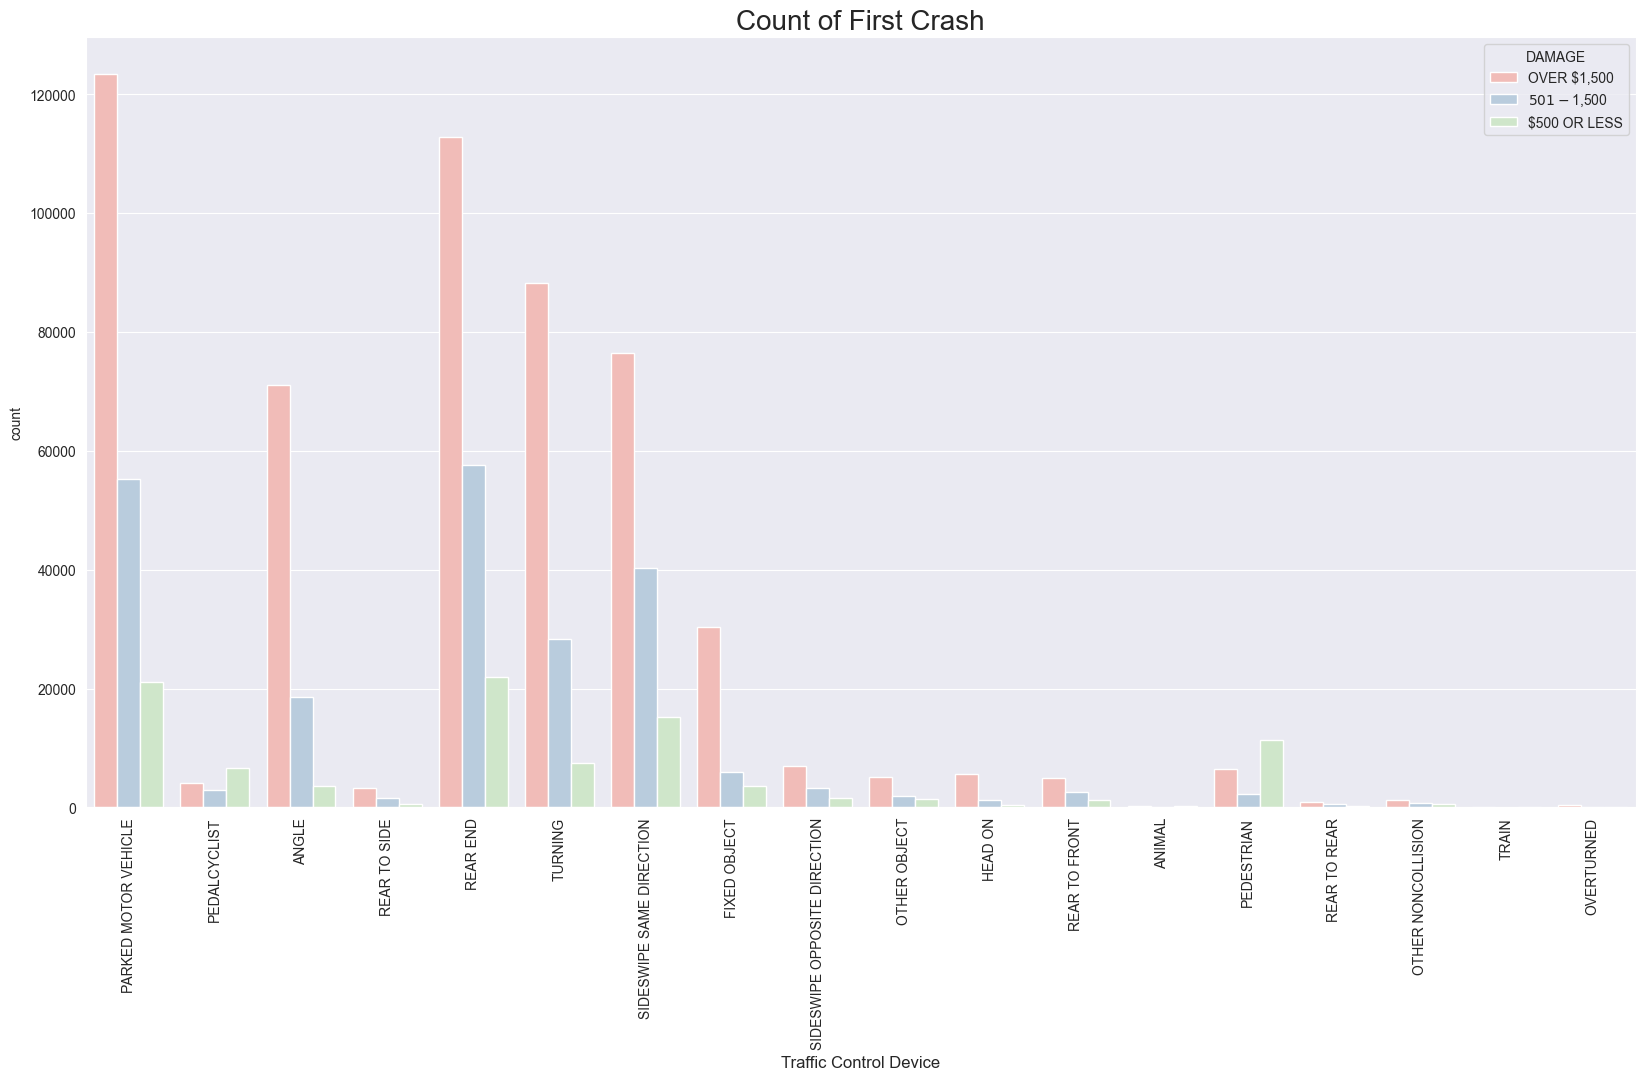

In [16]:
plt.figure(figsize=(20,10))

sns.countplot(df, x="FIRST_CRASH_TYPE", palette= colors_arbitrary_2, hue = 'DAMAGE')
plt.title("Count of First Crash", fontsize=20)
plt.xlabel("Traffic Control Device", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Interestingly, we can see where the impacts occur for medium and high damage. For car design, it gives us information about where to strengthen the vehicle bodywork for low-speed impacts.

#### COUNT TRAFFICWAY TYPE

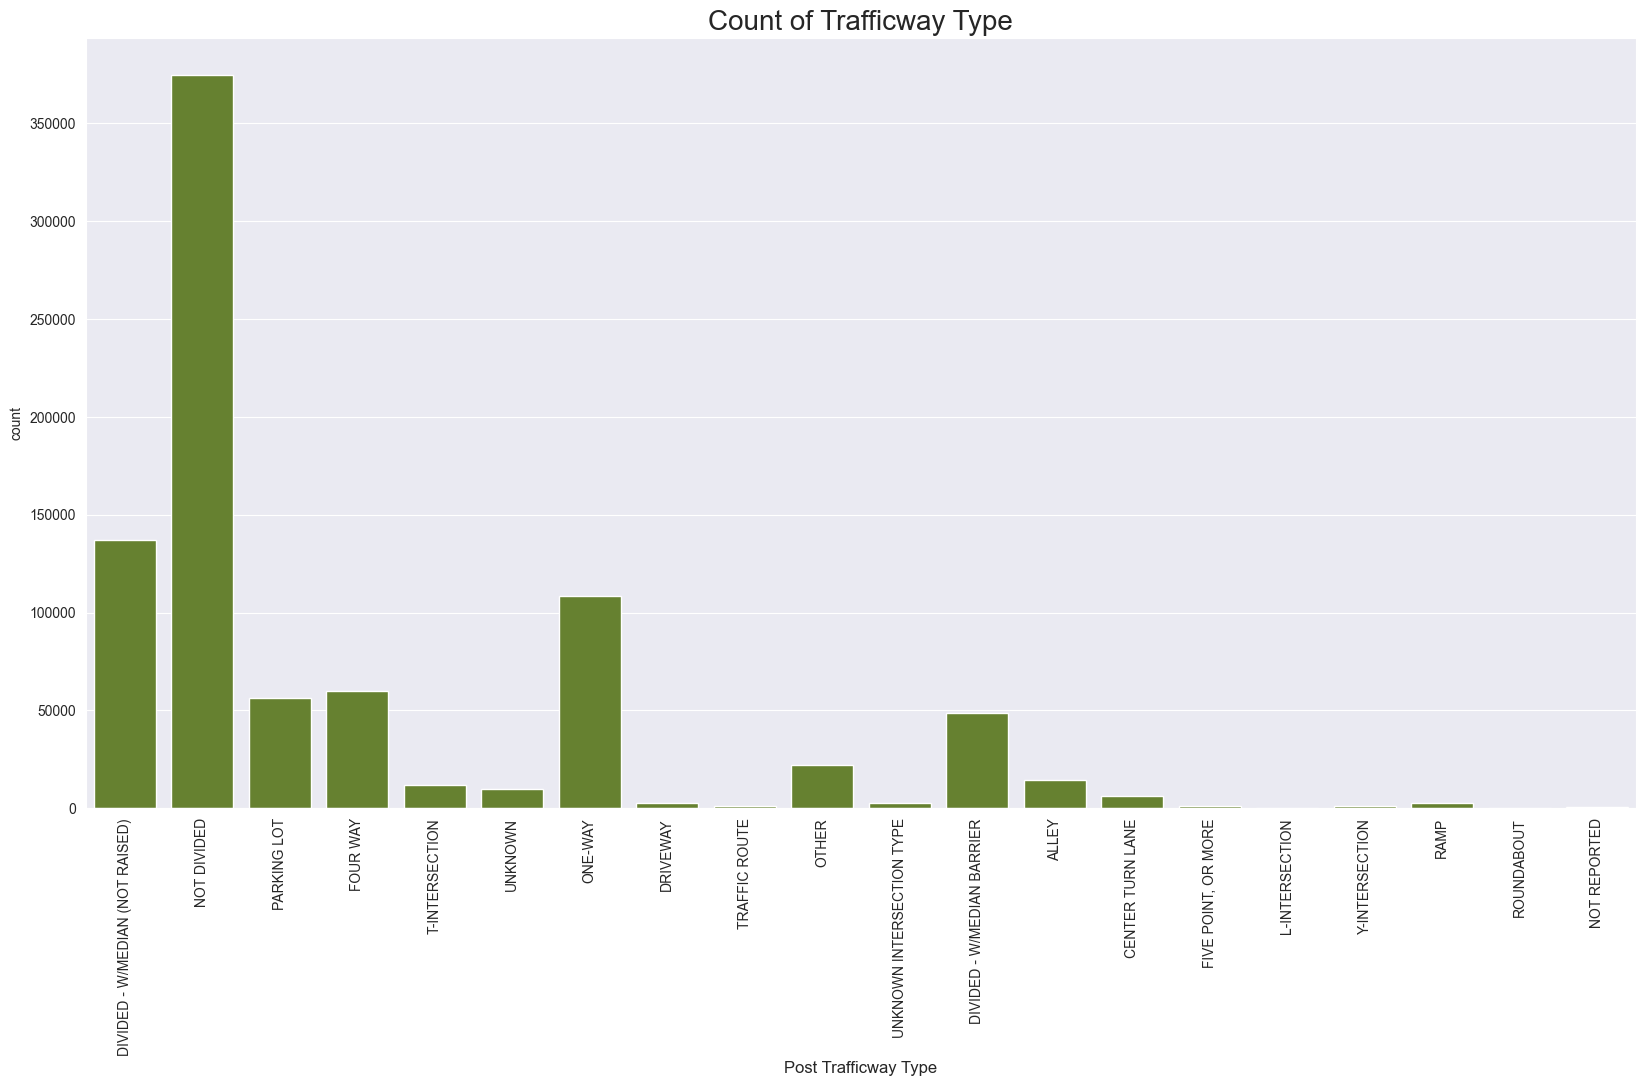

In [17]:
plt.figure(figsize=(20,10))

sns.countplot(df, x="TRAFFICWAY_TYPE", color="olivedrab")
plt.title("Count of Trafficway Type", fontsize=20)
plt.xlabel("Post Trafficway Type", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Not dividing it is possible to determine the cause of car crashes. We can design roads with special controls to reduce the possibility of accidents.

#### COUNT OF ALIGNMENT

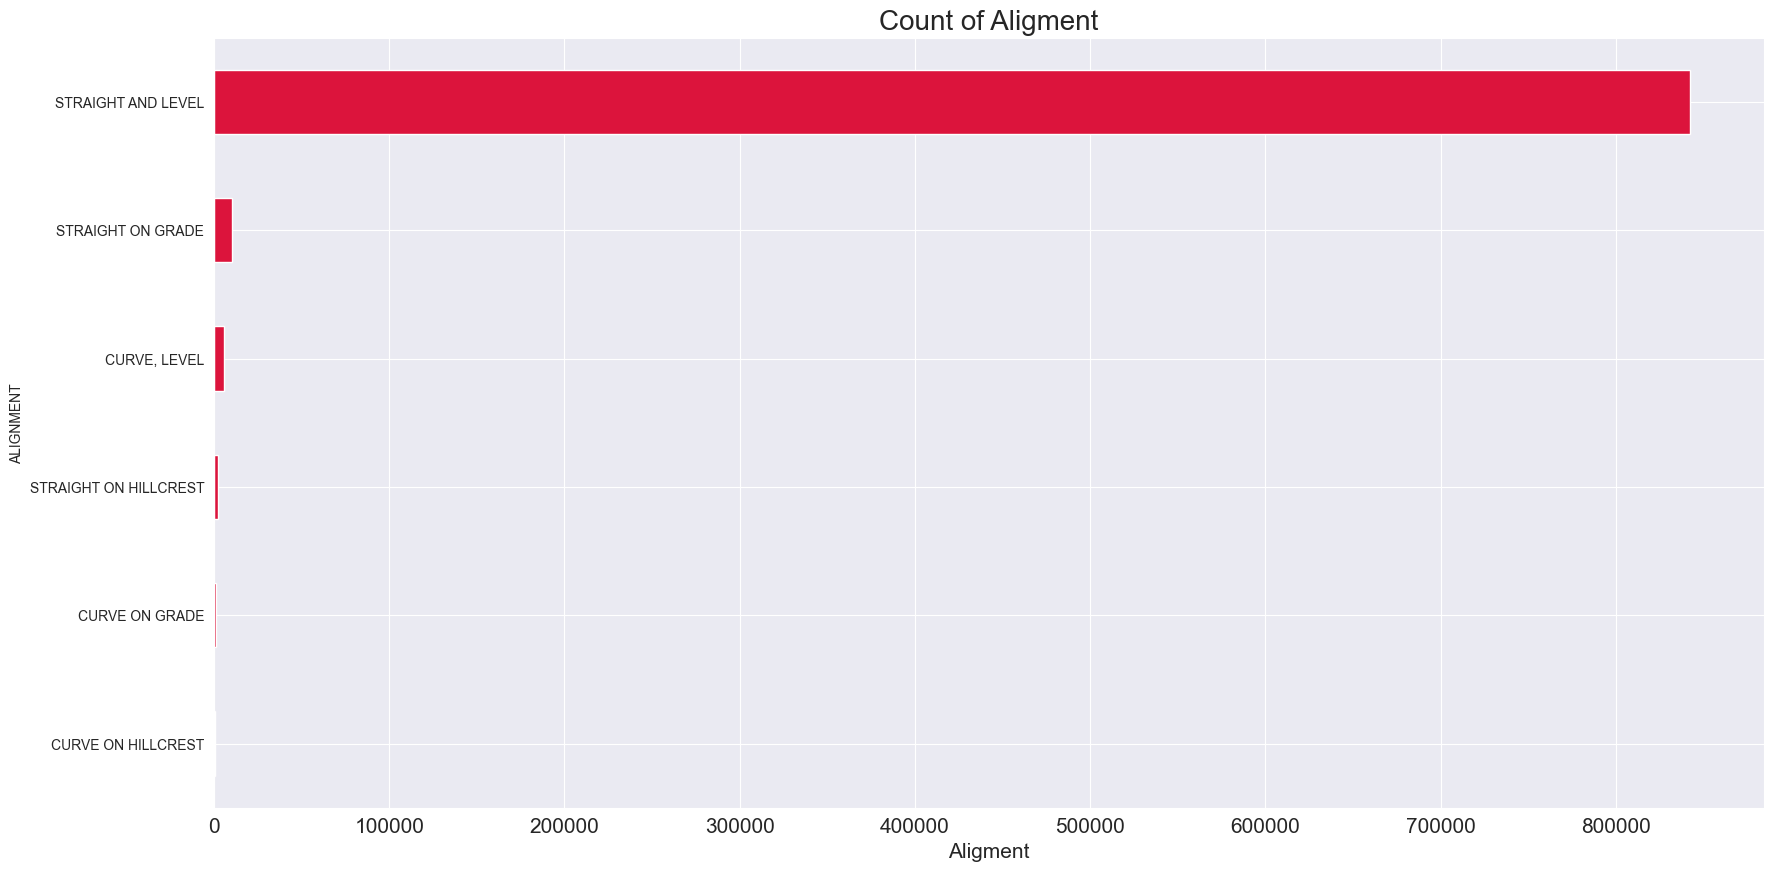

In [18]:
plt.figure(figsize=(20,10))

df["ALIGNMENT"].value_counts().sort_values(ascending=True).plot(kind='barh', color = 'crimson')

plt.title("Count of Aligment", fontsize=20)
plt.xlabel("Aligment", fontsize=15)
plt.xticks(fontsize=15)

plt.show()

The road is straight and level. This doesn't influence and doesn't add value, so we can drop it for ML modeling.

#### COUNT OF ROADWAY SURFACE CONDITION

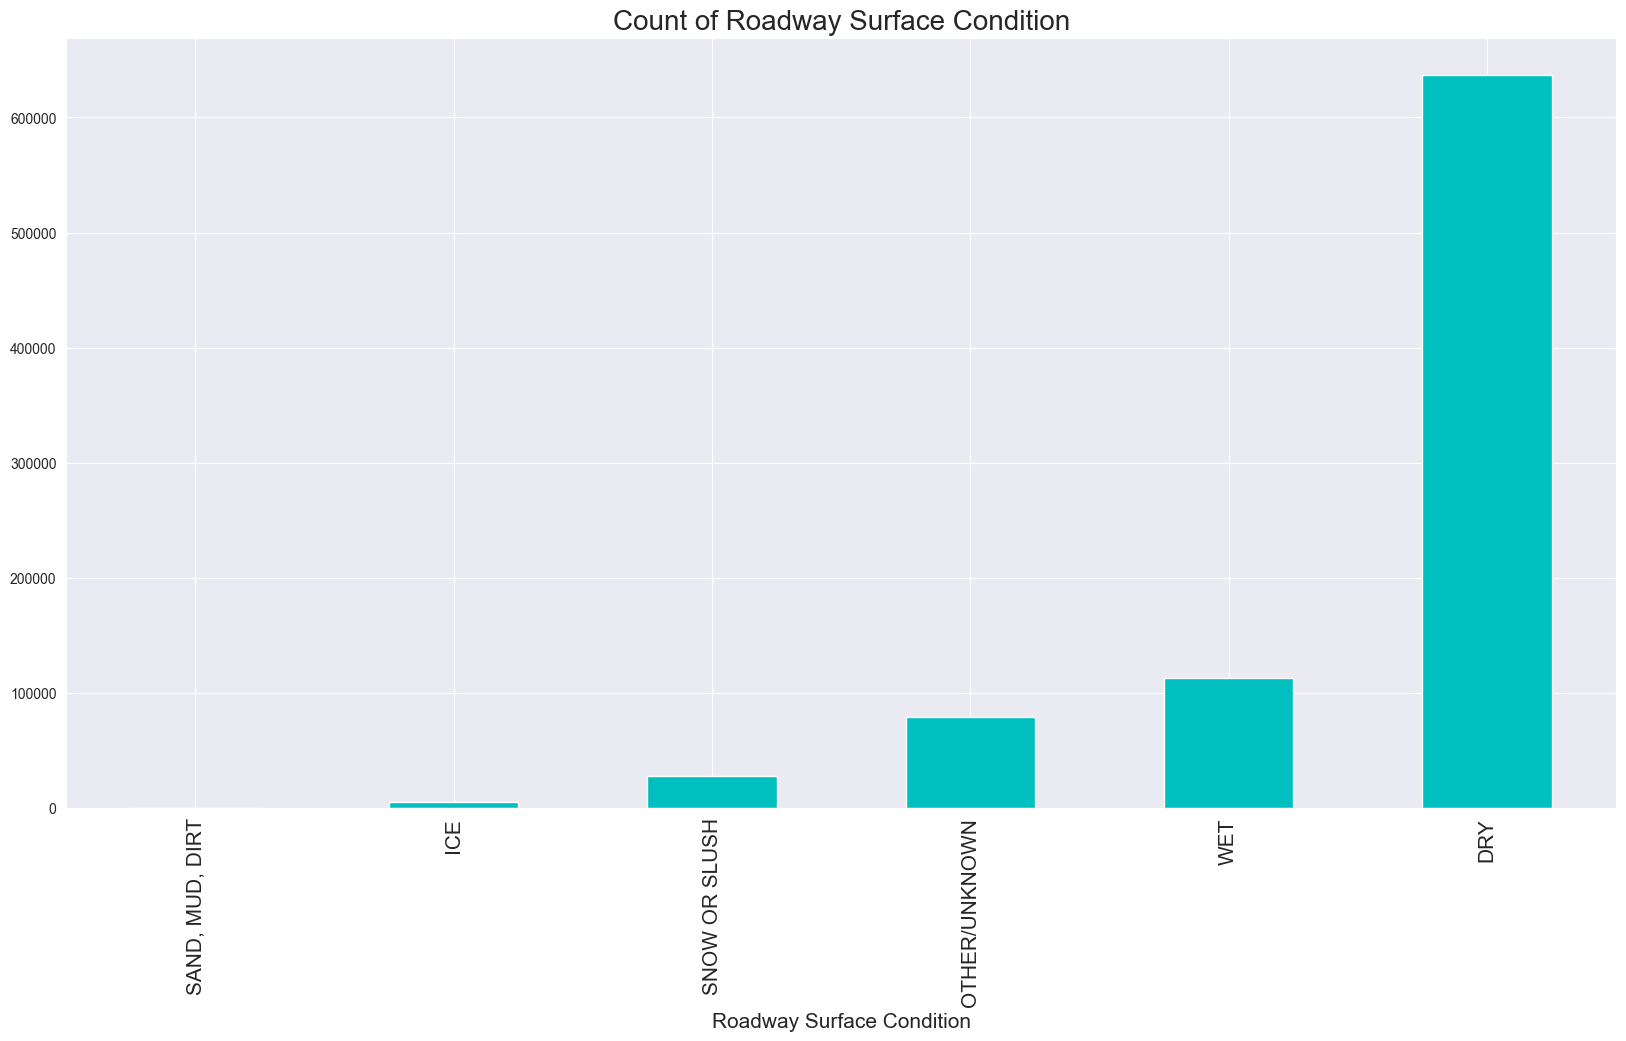

In [19]:
plt.figure(figsize=(20,10))

df["ROADWAY_SURFACE_COND"].value_counts().sort_values(ascending=True).plot(kind='bar', color = 'c')

plt.title("Count of Roadway Surface Condition", fontsize=20)
plt.xlabel("Roadway Surface Condition", fontsize=15)
plt.xticks(fontsize=15)

plt.show()

The road is commonly dry. This doesn't influence the results and doesn't add value, so we can drop it for ML modeling.

#### COUNT OF ROAD DEFECT

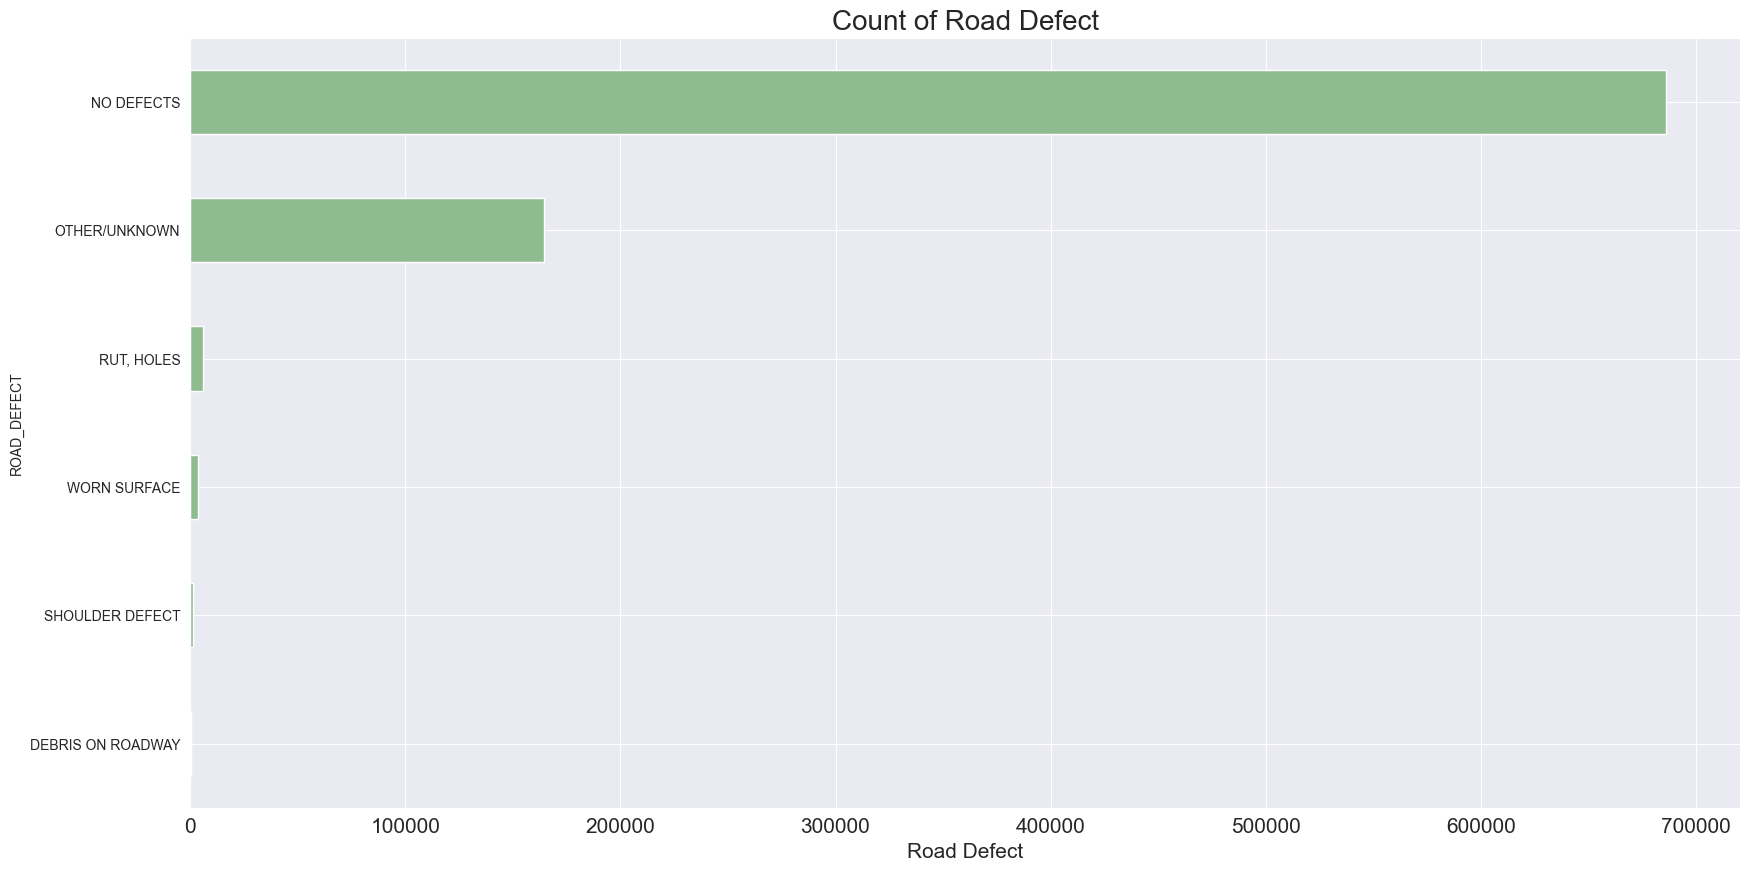

In [20]:
plt.figure(figsize=(20,10))

df["ROAD_DEFECT"].value_counts().sort_values(ascending=True).plot(kind='barh', color = 'darkseagreen')

plt.title("Count of Road Defect", fontsize=20)
plt.xlabel("Road Defect", fontsize=15)
plt.xticks(fontsize=15)

plt.show()

The most common categories are no defects and unidentified information. This column doesn't add value, so we can drop it from the analysis and ML modeling.

#### REPORT TYPE PERCENTAGE

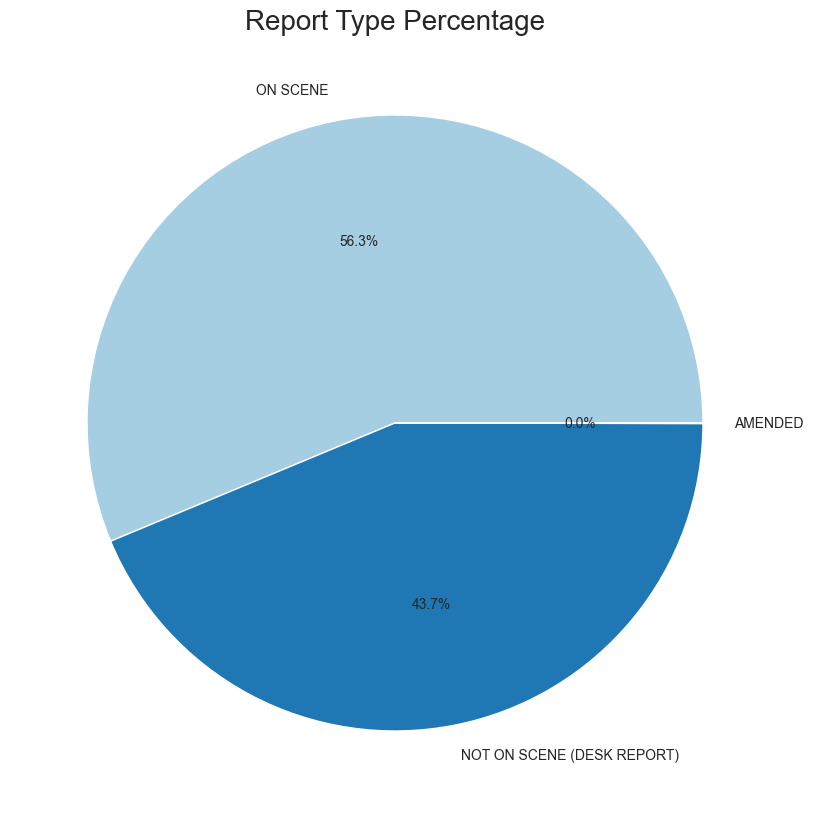

In [21]:
plt.figure(figsize=(10,10))

plt.pie(data=df, x = df["REPORT_TYPE"].value_counts(), labels = df["REPORT_TYPE"].unique(), autopct='%1.1f%%', colors=colors_arbitrary_1)

plt.title("Report Type Percentage", fontsize=20)

plt.show()

Over 40% of reports are Desk Reports; this situation is not recommended because expert analysis cannot be carried out, and the reconstruction of the facts will be unreliable.

#### CRASH TYPE  PERCENTAJE

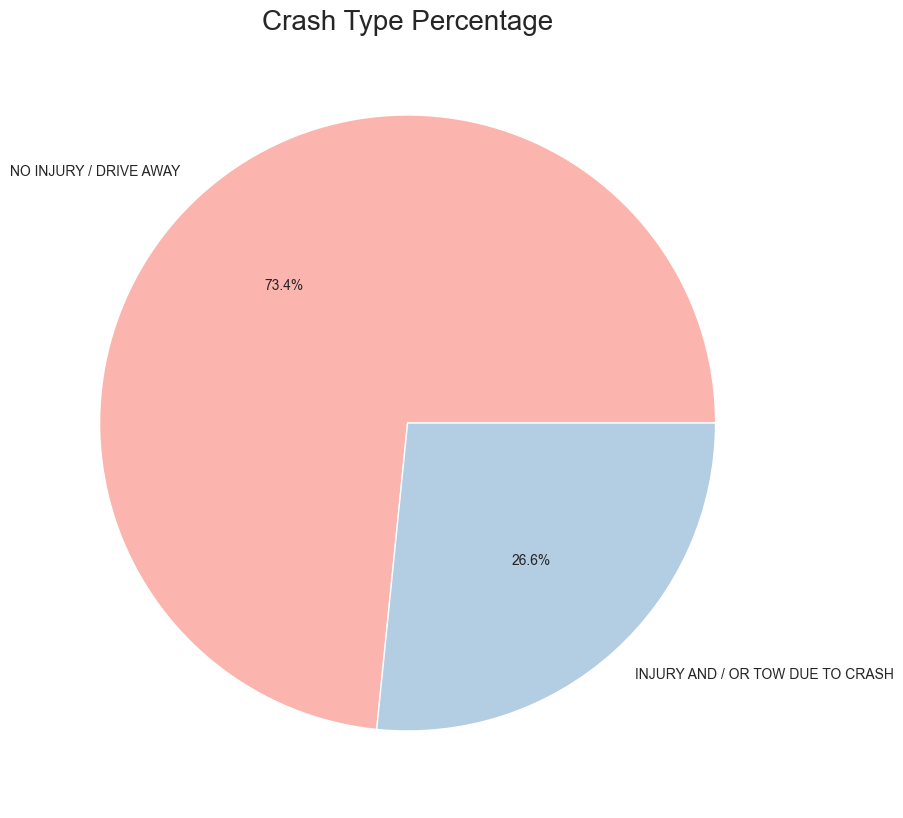

In [22]:
plt.figure(figsize=(10,10))

plt.pie(data=df, x = df["CRASH_TYPE"].value_counts(), labels = df["CRASH_TYPE"].unique(), autopct='%1.1f%%',
        colors=colors_arbitrary_2)

plt.title("Crash Type Percentage", fontsize=20)

plt.show()

In a somewhat calming way, above 70% of the accidents don't produce any injury and the drivers go on their own way, but the rest involve injury or tow. We can use this column as a target column for ML model classification. This model determines if the accident will be "soft" (no injury, drives away) or "hard" (injury, possibly tow).

#### HIT AND RUN PERCENTAJE

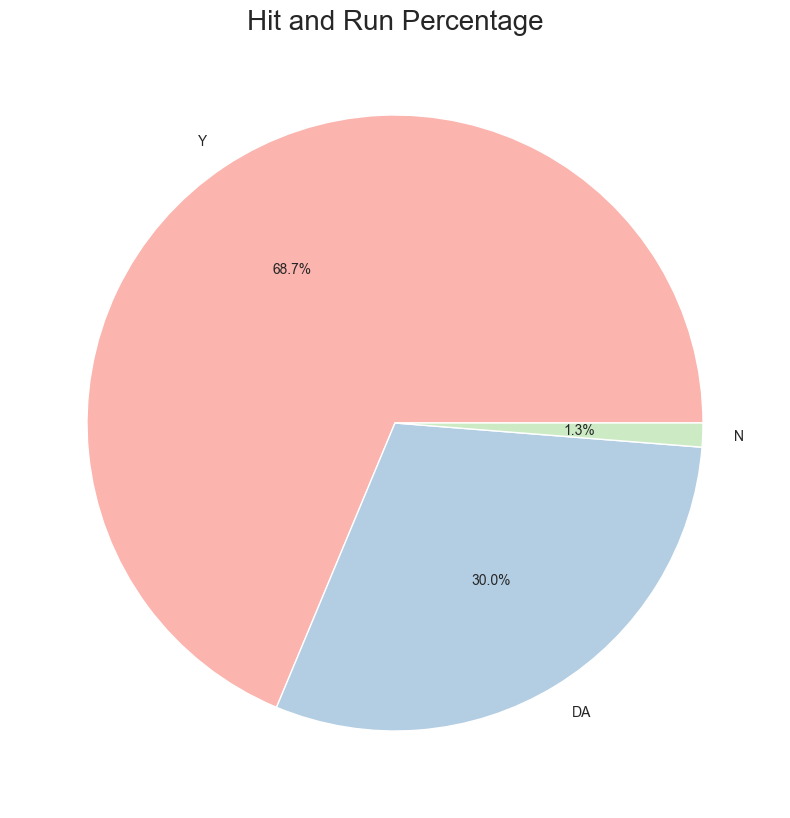

In [23]:
plt.figure(figsize=(10,10))

plt.pie(data=df, x = df["HIT_AND_RUN_I"].value_counts(), labels = df["HIT_AND_RUN_I"].unique(), autopct='%1.1f%%',
        colors=colors_arbitrary_2)

plt.title("Hit and Run Percentage", fontsize=20)

plt.show()

There is much irresponsibility in traffic crashes, with almost 70% of cases where drivers hit and run. There are around 30% that either don't apply or we don't know about. We could collect more data on this 30% to determine what happened, and use some artifact or device to prevent drivers from hitting and running away.

#### DAMAGE AMOUNT PERCENTAJE

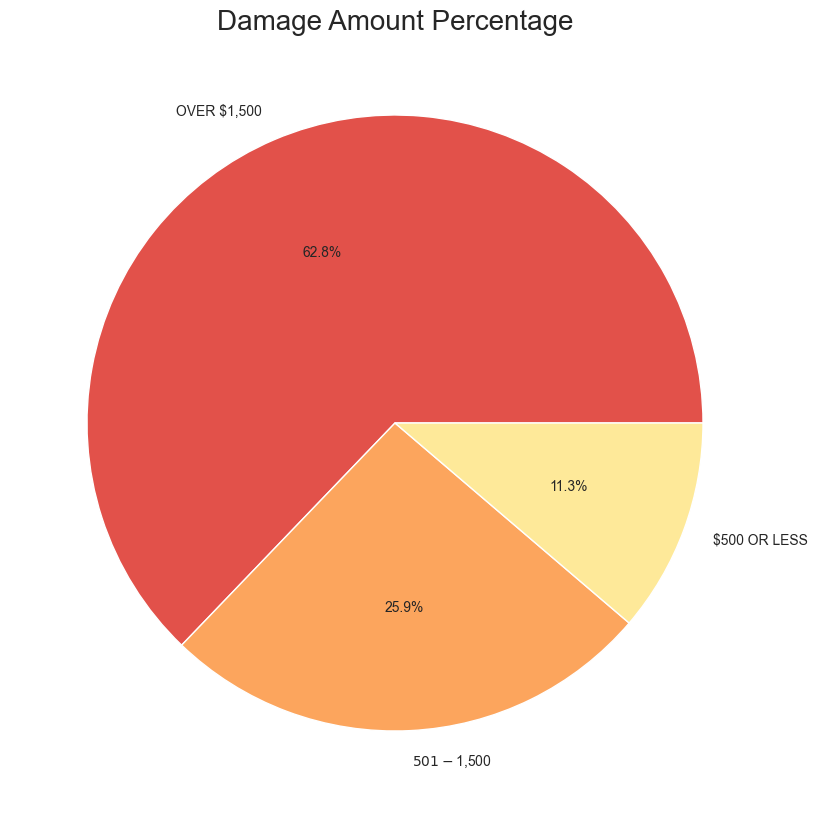

In [24]:
plt.figure(figsize=(10,10))

plt.pie(data=df, x = df["DAMAGE"].value_counts(), labels = df["DAMAGE"].unique(), autopct='%1.1f%%',
        colors=colors_arbitrary_3)

plt.title("Damage Amount Percentage", fontsize=20)

plt.show()

"Yes, almost 75% of accidents cost over $500, and almost 63% cost over $1,500. Possibly, we can use this column as a target in ML classification model.

#### PERCENT OF PRIMARY CONTRIBUTORY CAUSE

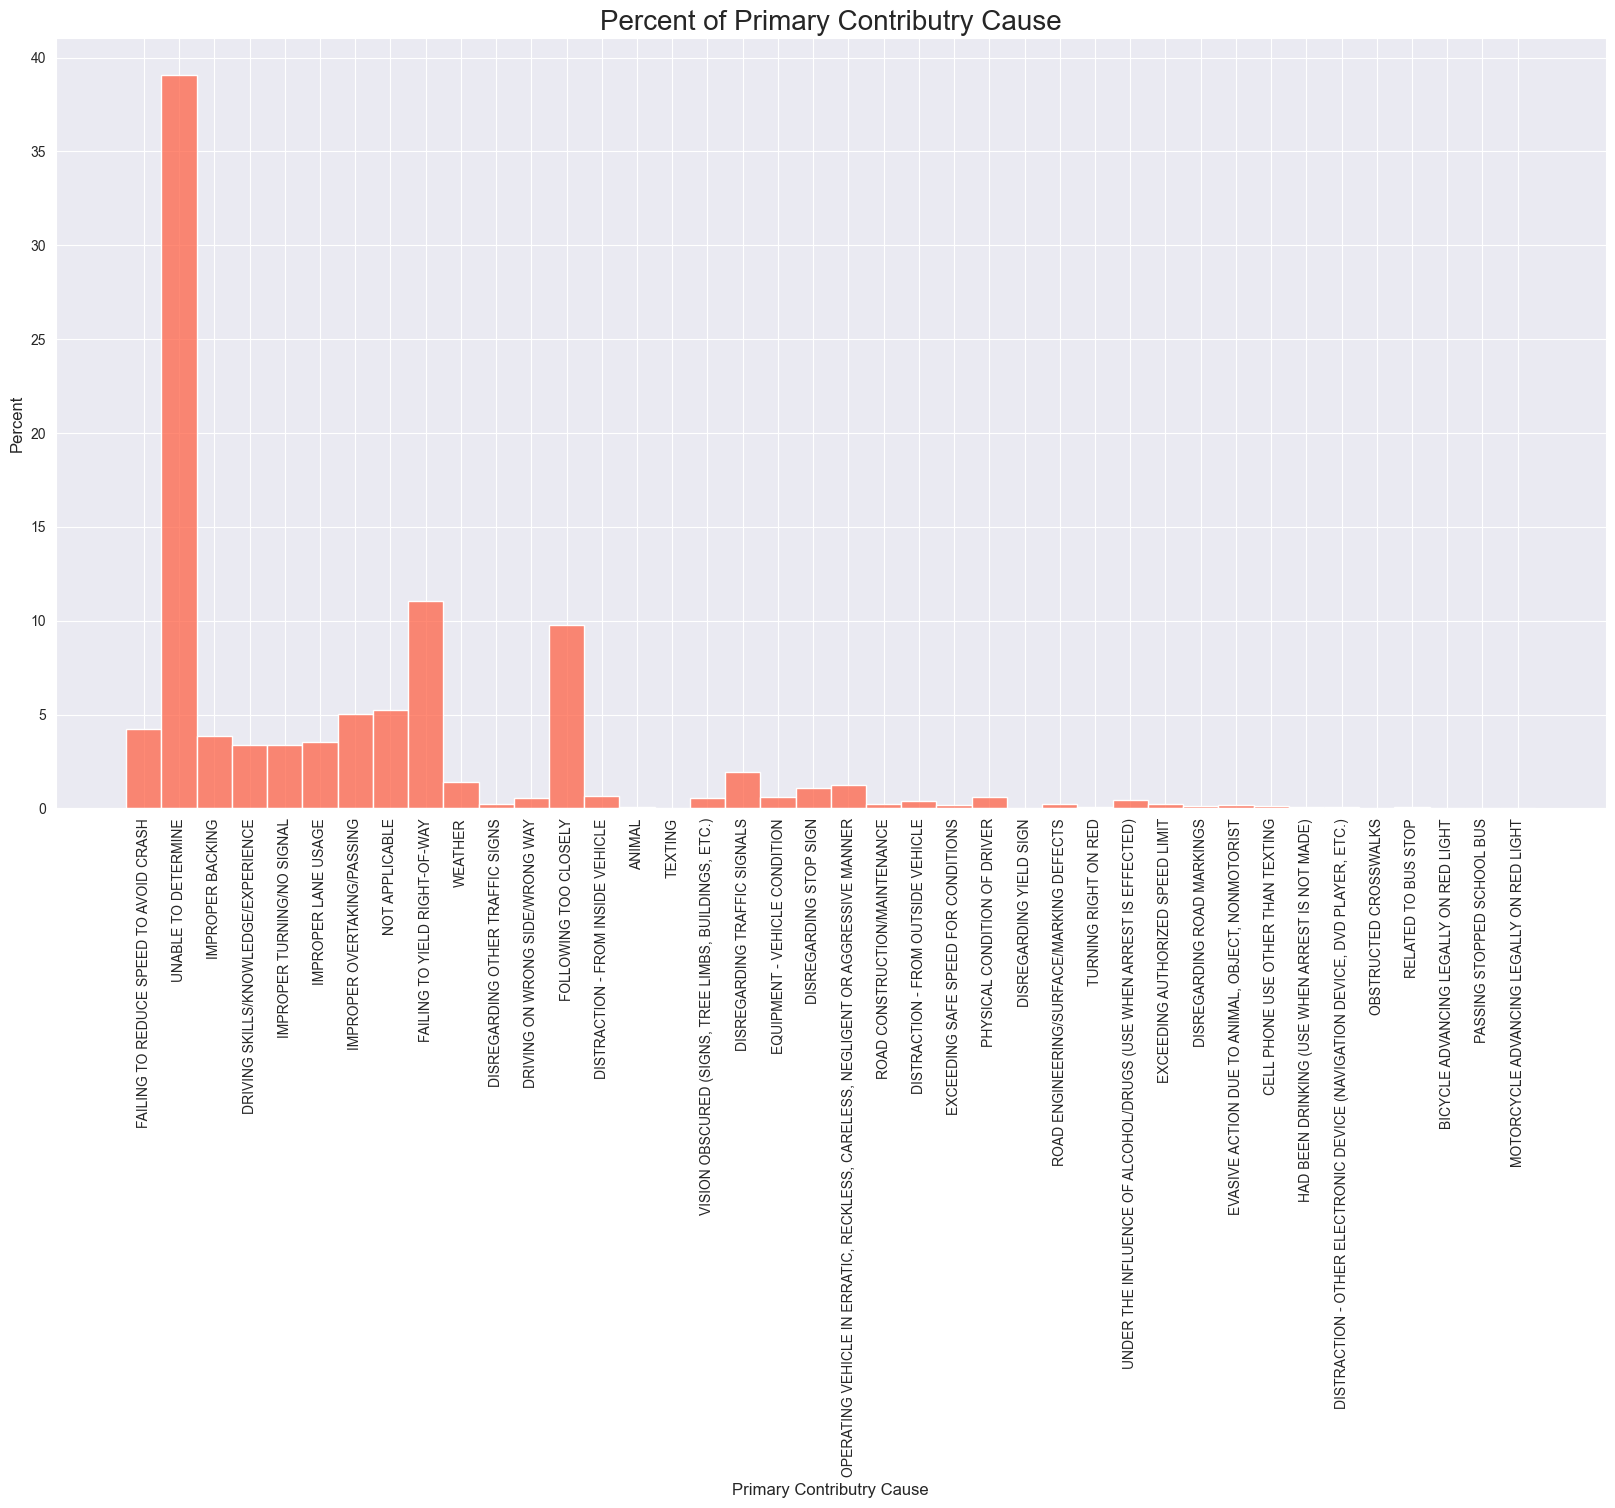

In [25]:
plt.figure(figsize=(20,10))

sns.histplot(df, x="PRIM_CONTRIBUTORY_CAUSE", color="tomato", stat = 'percent' )
plt.title("Percent of Primary Contributry Cause", fontsize=20)
plt.xlabel("Primary Contributry Cause", fontsize=12, )
plt.ylabel("Percent", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Although over 45 percent are unable to be determined or not applicable, we can see some bad driver practices, so the drivers could avoid the accidents if they had driven well.

#### SECUNDARY CONTRIBUTORY CAUSE

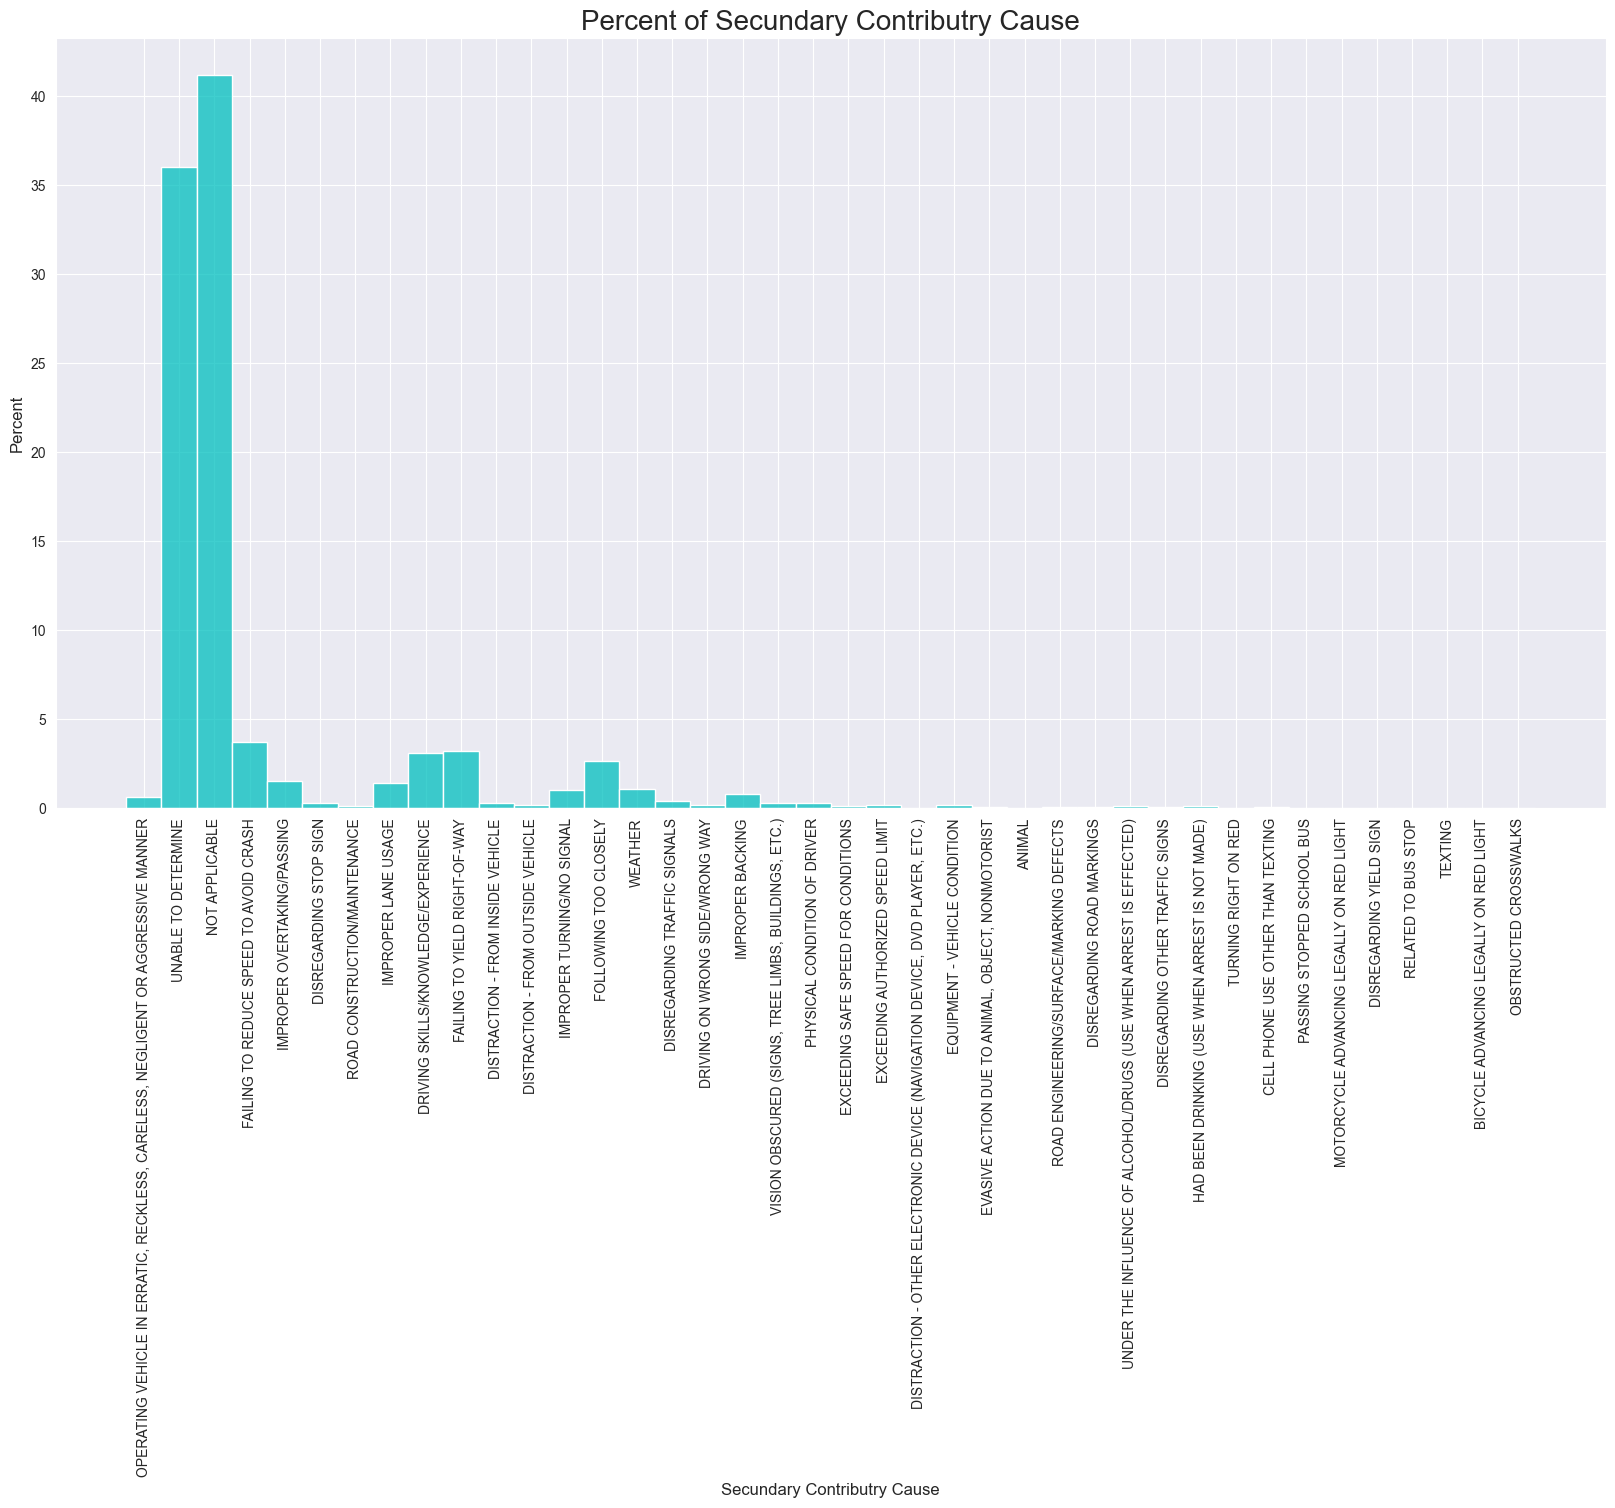

In [26]:
plt.figure(figsize=(20,10))

sns.histplot(df, x="SEC_CONTRIBUTORY_CAUSE", color="c", stat = 'percent' )
plt.title("Percent of Secundary Contributry Cause", fontsize=20)
plt.xlabel("Secundary Contributry Cause", fontsize=12, )
plt.ylabel("Percent", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Over 75 percent is undetermined or not applicable, and the causes are similar to the first cause. We can drop this column for ML modeling.

#### PERCENT OF NUMBER OF AFFECTED UNITS

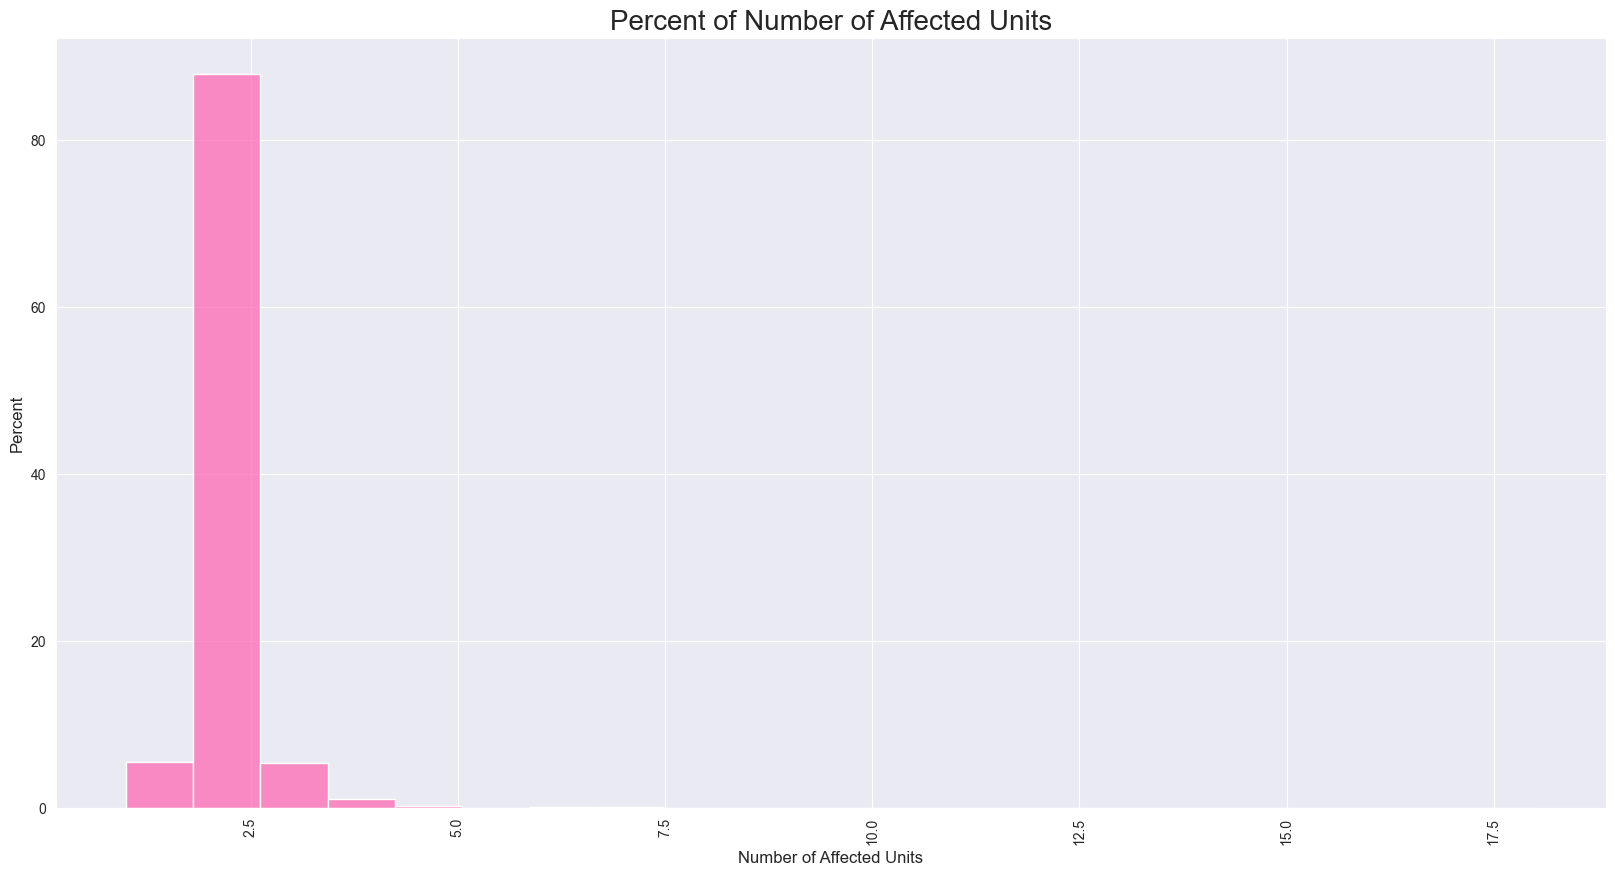

In [27]:
plt.figure(figsize=(20,10))

sns.histplot(df, x="NUM_UNITS", color="hotpink", stat='percent' )
plt.title("Percent of Number of Affected Units", fontsize=20)
plt.xlabel("Number of Affected Units", fontsize=12, )
plt.ylabel("Percent", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

It makes sense that the affected units are around 2.5, because those affected are the car, the driver, and the object that was hit. In other cases those affected are two or three cars. This column doesn't add value, so we can drop it from the analysis and ML modeling.

#### DISTRIBUTION OF NUMBER OF AFFECTED UNITS VS POSTED SPEED LIMIT

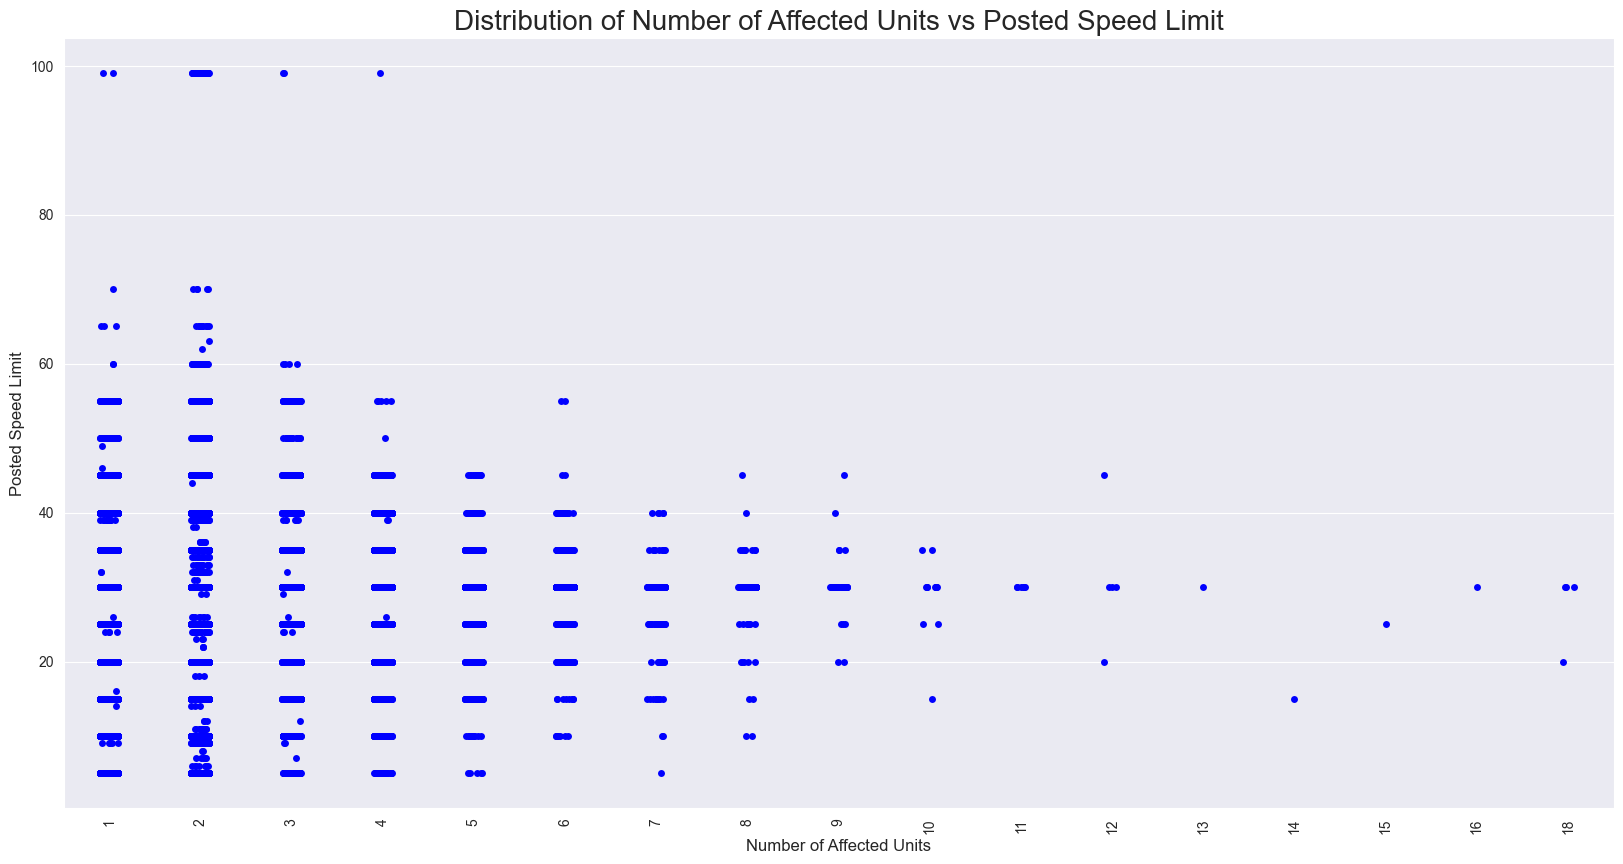

In [28]:
plt.figure(figsize=(20,10))

sns.stripplot(df, x="NUM_UNITS", y ="POSTED_SPEED_LIMIT", color="b" )
plt.title("Distribution of Number of Affected Units vs Posted Speed Limit", fontsize=20)
plt.xlabel("Number of Affected Units", fontsize=12, )
plt.ylabel("Posted Speed Limit", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Yes, the distribution is concentrated in low posted speed limits, so velocity is not necessarily implicit in accident occurrence.

#### MOST SEVERE INJURY PERCENTAGE

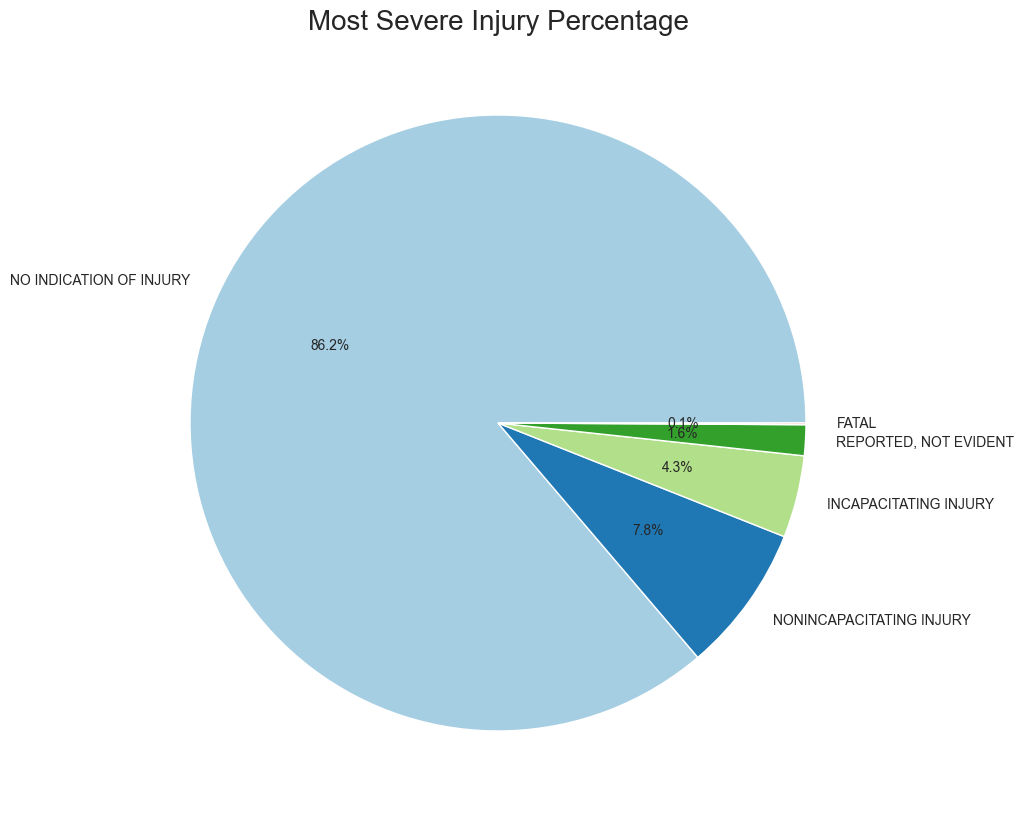

In [29]:
plt.figure(figsize=(10,10))

plt.pie(data=df, x = df["MOST_SEVERE_INJURY"].value_counts(), labels = df["MOST_SEVERE_INJURY"].unique(), autopct='%1.1f%%',
        colors=colors_arbitrary_1)

plt.title("Most Severe Injury Percentage", fontsize=20)

plt.show()

Amazing, over 86 percent don't present injury and over 7.8 percent don't cause incapacity. This agrees with the fact that the accidents occurred at low speeds, so the impacts are softer.

#### COUNT OF NUMBER OF INJURIES BY TYPE

In [30]:
def convert_to_df(column, columname_1, columname_2):
  injury_counts = df[column].value_counts().sort_values(ascending=False)
  new_df=pd.DataFrame({columname_1: injury_counts.index ,columname_2: injury_counts.values})

  return new_df

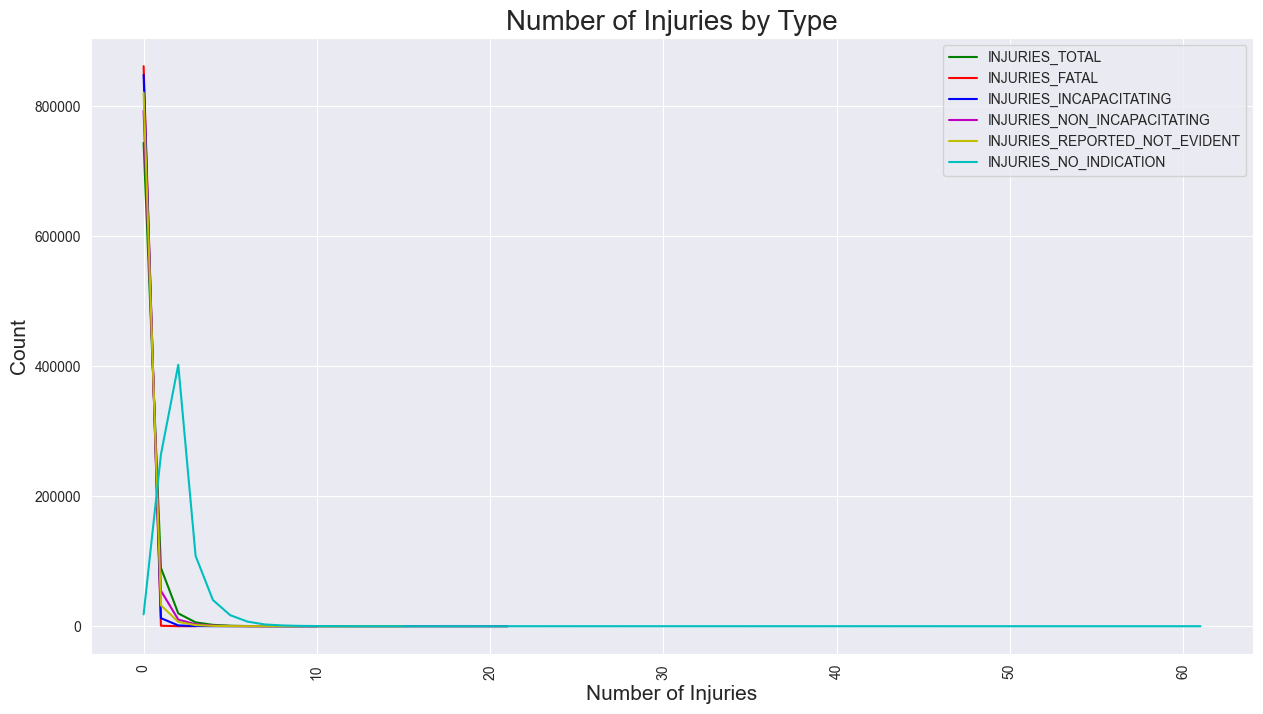

In [31]:
plt.figure(figsize=(15,8))

injuries_dict= {'INJURIES_TOTAL': 'g', 'INJURIES_FATAL': 'r',	'INJURIES_INCAPACITATING':'b',	'INJURIES_NON_INCAPACITATING':'m',
                'INJURIES_REPORTED_NOT_EVIDENT': 'y',	'INJURIES_NO_INDICATION':'c'}

for element in injuries_dict:
    new_df=convert_to_df(column=element, columname_1=element, columname_2='COUNT')
    sns.lineplot(data=new_df,  x=element, y="COUNT", color = injuries_dict[element], label=element)

plt.title("Number of Injuries by Type", fontsize=20)
plt.xlabel("Number of Injuries", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.show()

A very low number of injuries, with no significant patterns in these columns.

#### COUNT OF CRASH HOUR

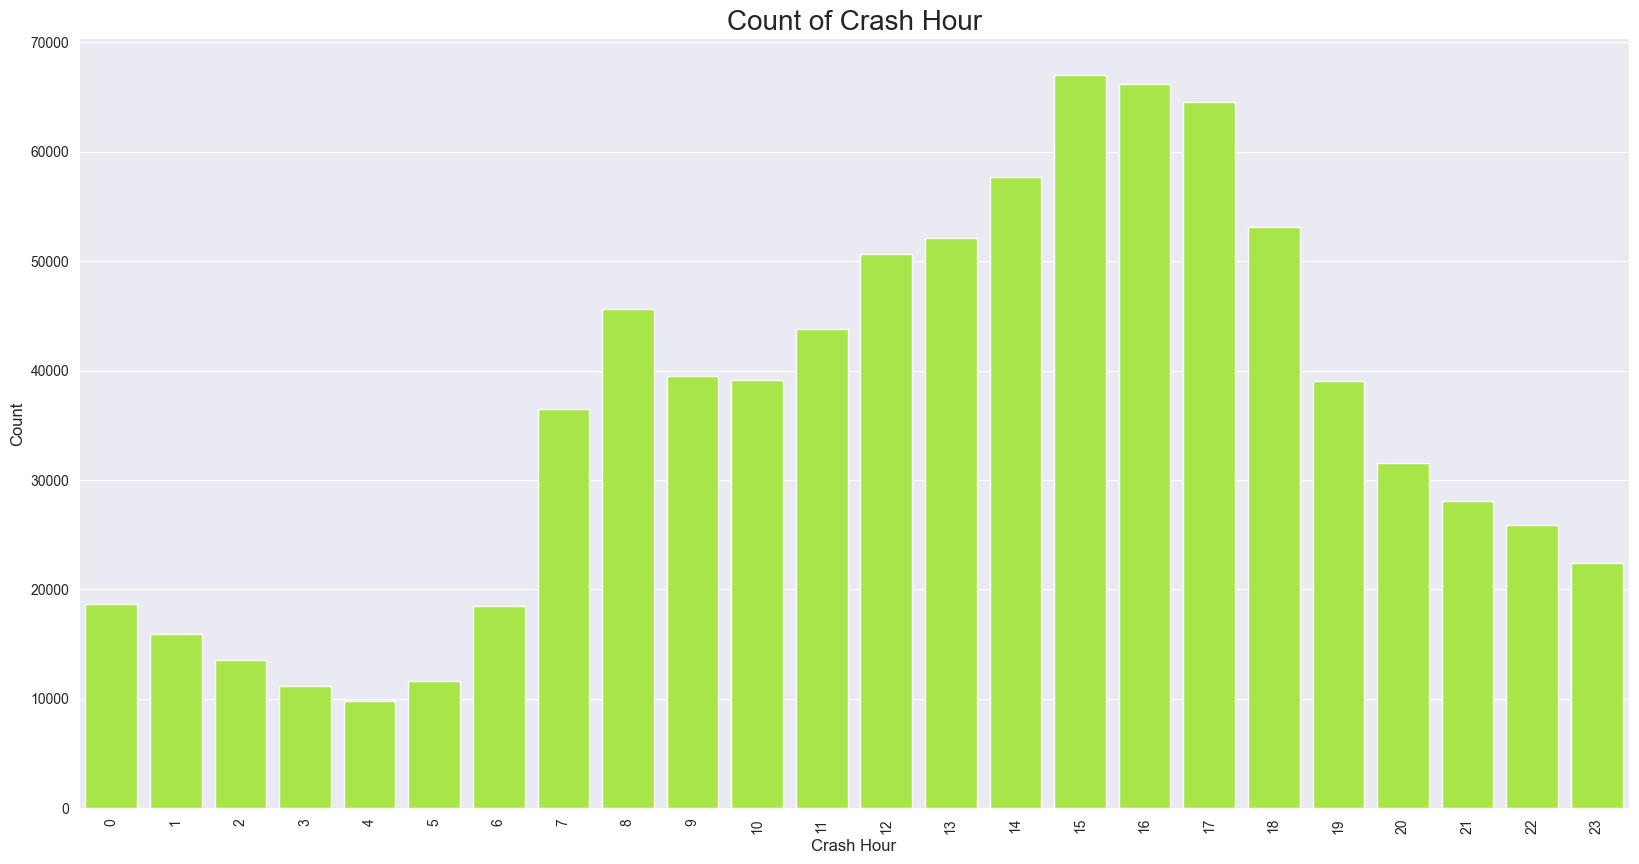

In [32]:
plt.figure(figsize=(20,10))

sns.countplot(df, x="CRASH_HOUR", color="greenyellow")
plt.title("Count of Crash Hour", fontsize=20)
plt.xlabel("Crash Hour", fontsize=12, )
plt.ylabel("Count", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

There is a time zone when traffic crashes increase, which is between 2 PM and 6 PM. This afternoon period coincides with departure times, worker fatigue, happy hours, or distractions like cellphone use.

#### COUNT OF CRASH DAY

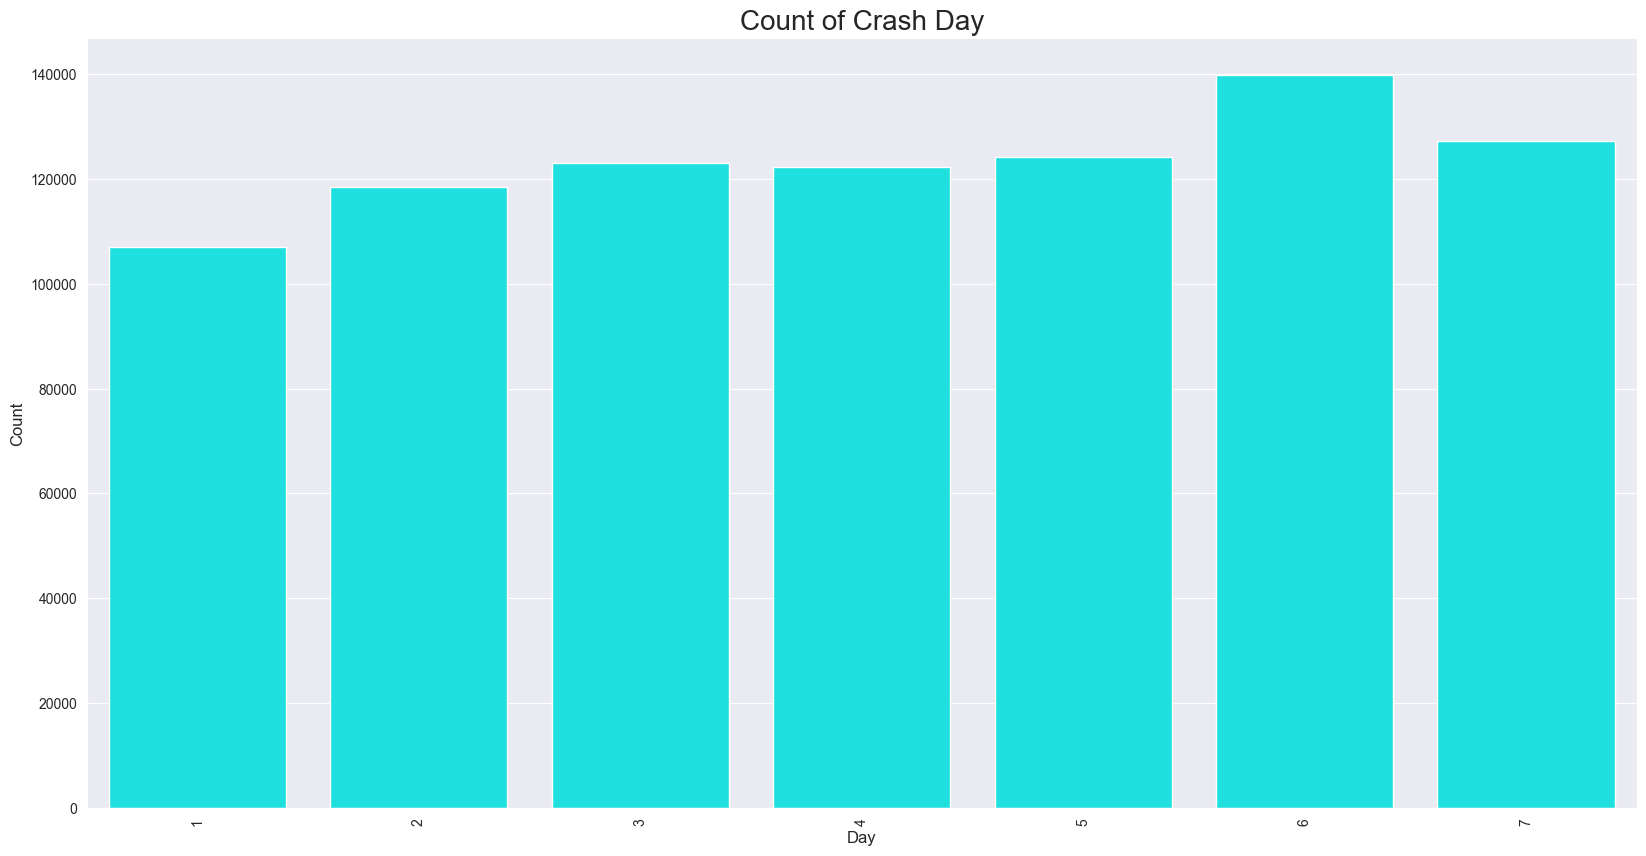

In [33]:
plt.figure(figsize=(20,10))

sns.countplot(df, x="CRASH_DAY_OF_WEEK", color="cyan")
plt.title("Count of Crash Day", fontsize=20)
plt.xlabel("Day", fontsize=12, )
plt.ylabel("Count", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Only on Saturdays, there is a slightly higher accident occurrence. This happens because of the increase in traffic flow on this day.

#### CRASH MONTH VS MONTH POLICE NOTIFIED

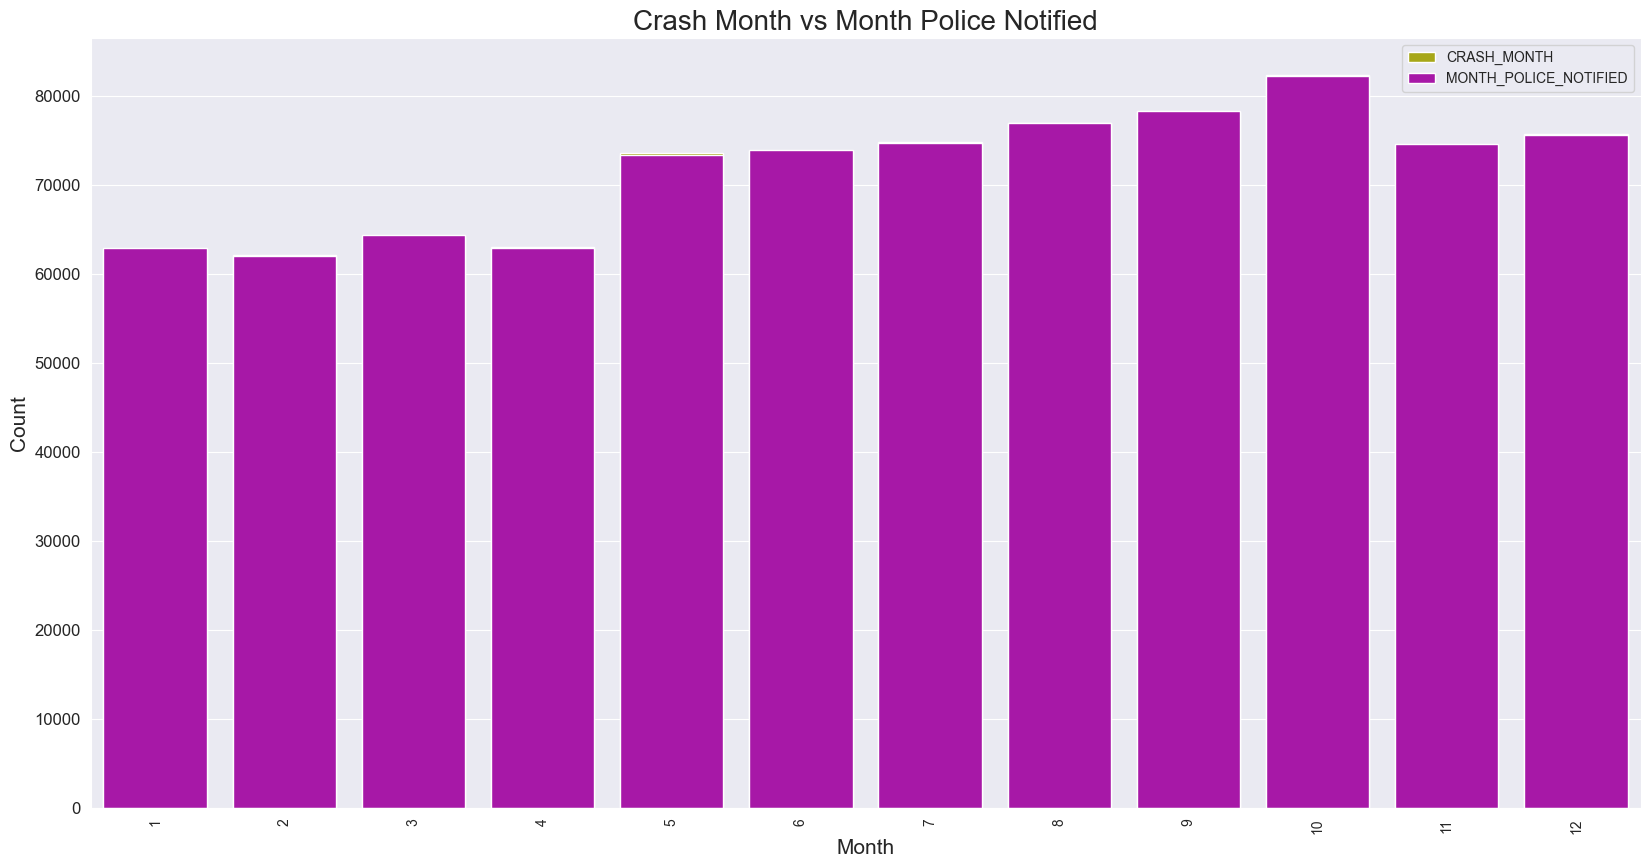

In [34]:
plt.figure(figsize=(20, 10))

day_columns = {'CRASH_MONTH':'y', 'MONTH_POLICE_NOTIFIED':'m'}

for col in day_columns:
    day_counts = df[col].value_counts().index
    sns.countplot(data=df[df[col].isin(day_counts)], x=col, label=col, color=day_columns[col])

plt.title('Crash Month vs Month Police Notified', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

They have the same value and there's nothing to analyze here. The 'Month Police Notified' column doesn't add value for ML classification modeling, so we can drop it.

#### CRASH YEAR VS YEAR POLICE NOTIFIED

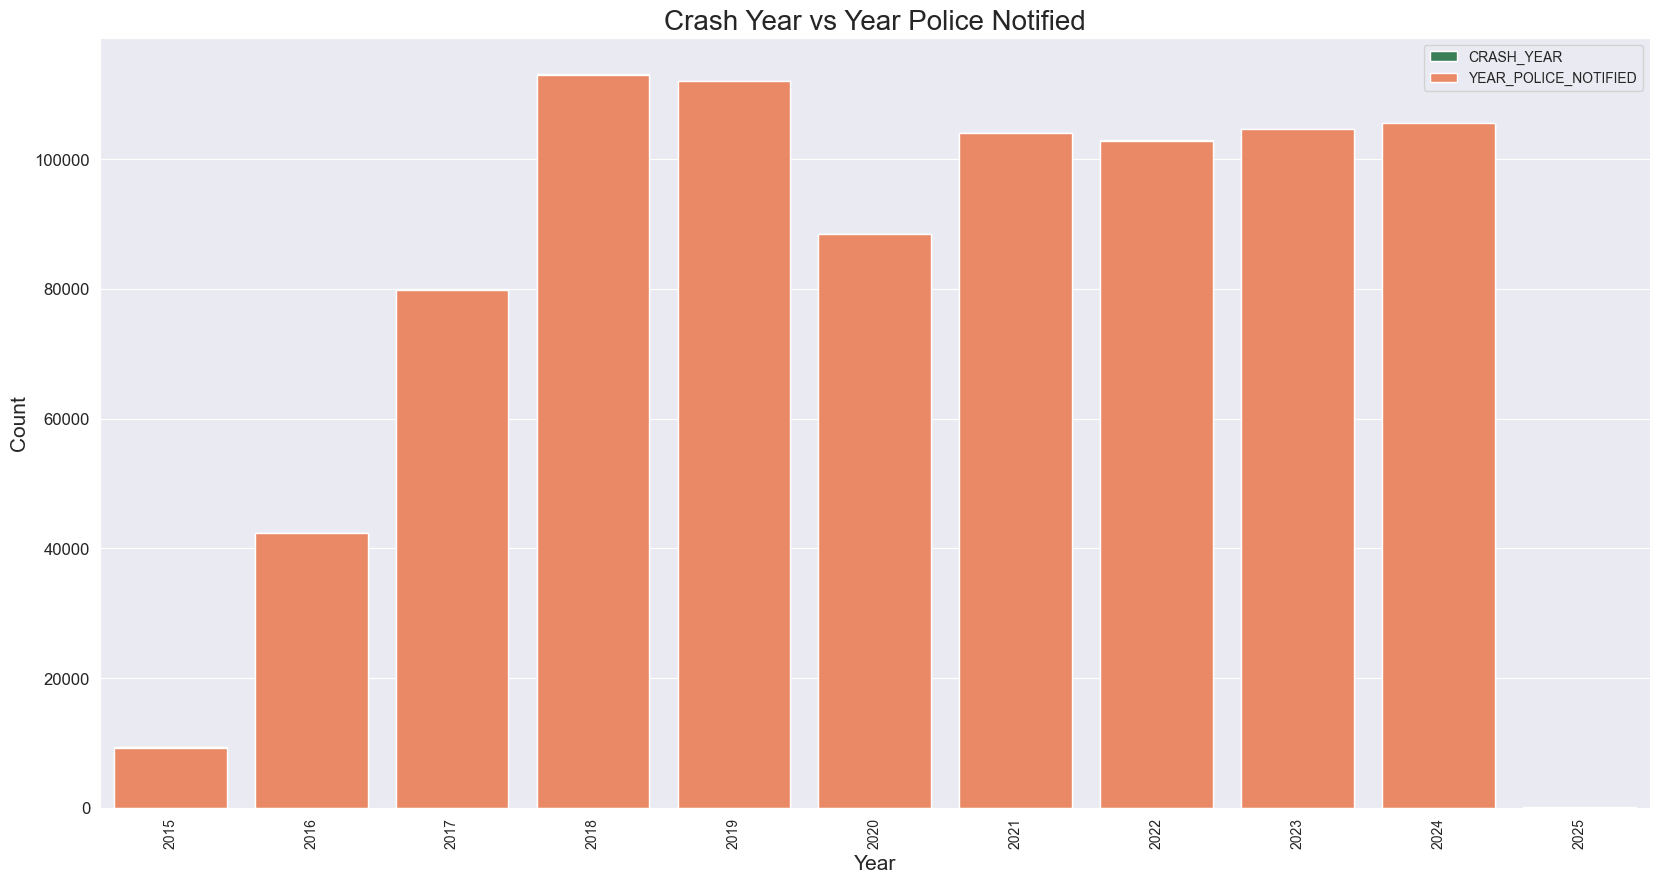

In [35]:
plt.figure(figsize=(20, 10))

day_columns = {'CRASH_YEAR':'seagreen', 'YEAR_POLICE_NOTIFIED':'coral'}

for col in day_columns:
    day_counts = df[col].value_counts().index
    sns.countplot(data=df[df[col].isin(day_counts)], x=col, label=col, color=day_columns[col])

plt.title('Crash Year vs Year Police Notified', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Similar to the previous columns, there's nothing to analyze here and these columns don't add value for ML classification modeling, so we can drop them.

#### CRASH HOUR DISTRIBUTION BY CRASH TYPE

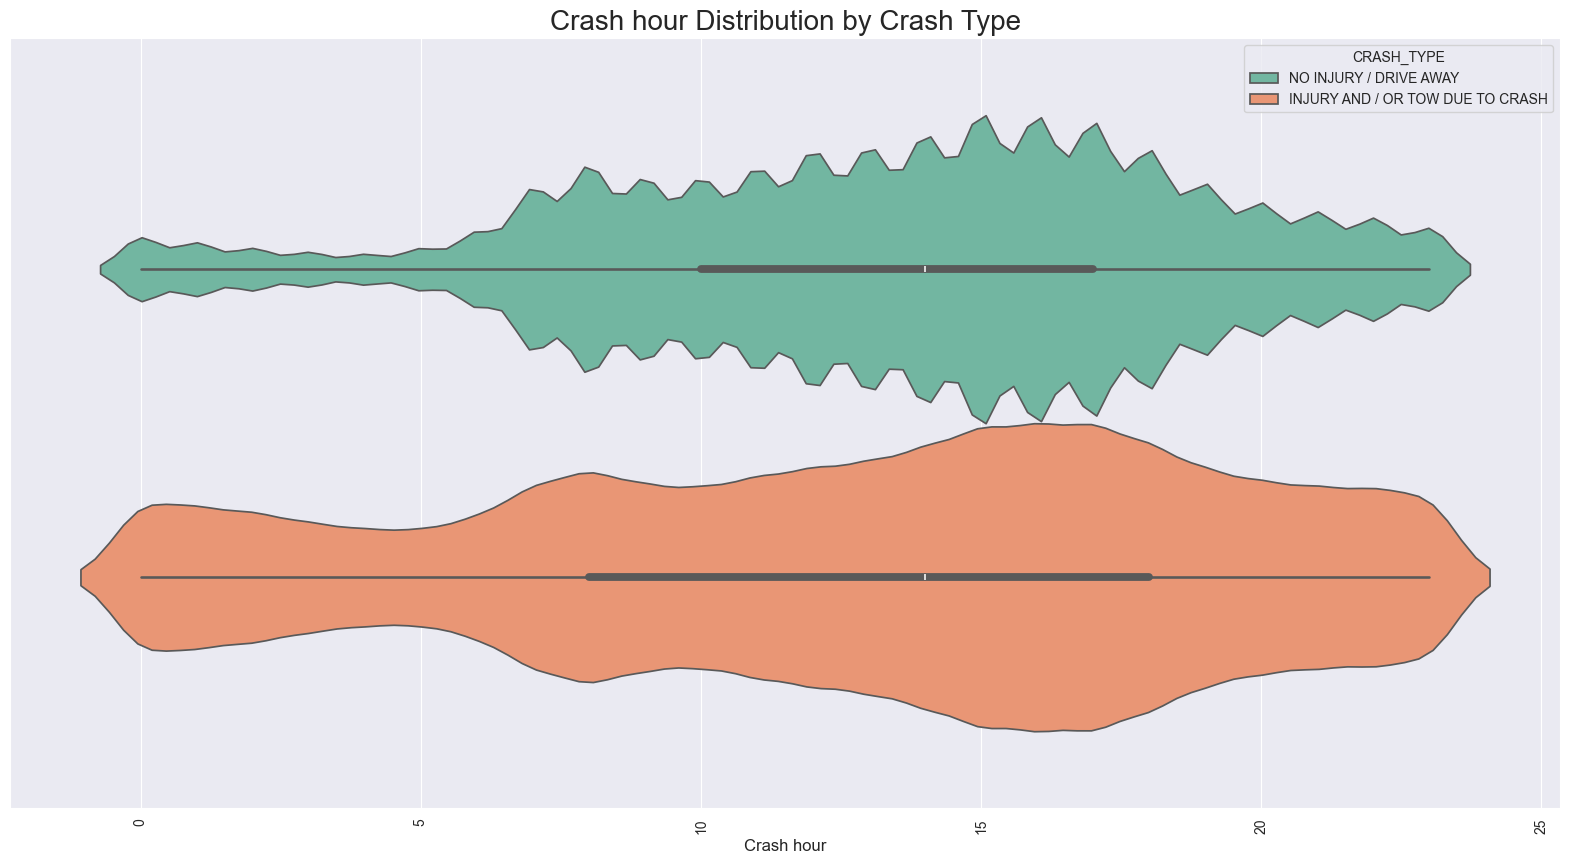

In [36]:
plt.figure(figsize=(20,10))

sns.violinplot(df, x="CRASH_HOUR",hue= "CRASH_TYPE", palette=colors_arbitrary )
plt.title("Crash hour Distribution by Crash Type", fontsize=20)
plt.xlabel("Crash hour", fontsize=12, )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

The saw teeth form in the first graph confirms the low-speed impacts during peak hours. The drivers are starting or finishing driving and they are crashing with other drivers doing the same thing. Both graphics present high volume in afternoon hours, which means that the drivers are tired, distracted, or experiencing other issues. There are more high-speed accidents at dawn because of low traffic, and drivers tend to run faster during these hours.

#### CORRELATION MATRIX OF TRAFFIC CRASHES

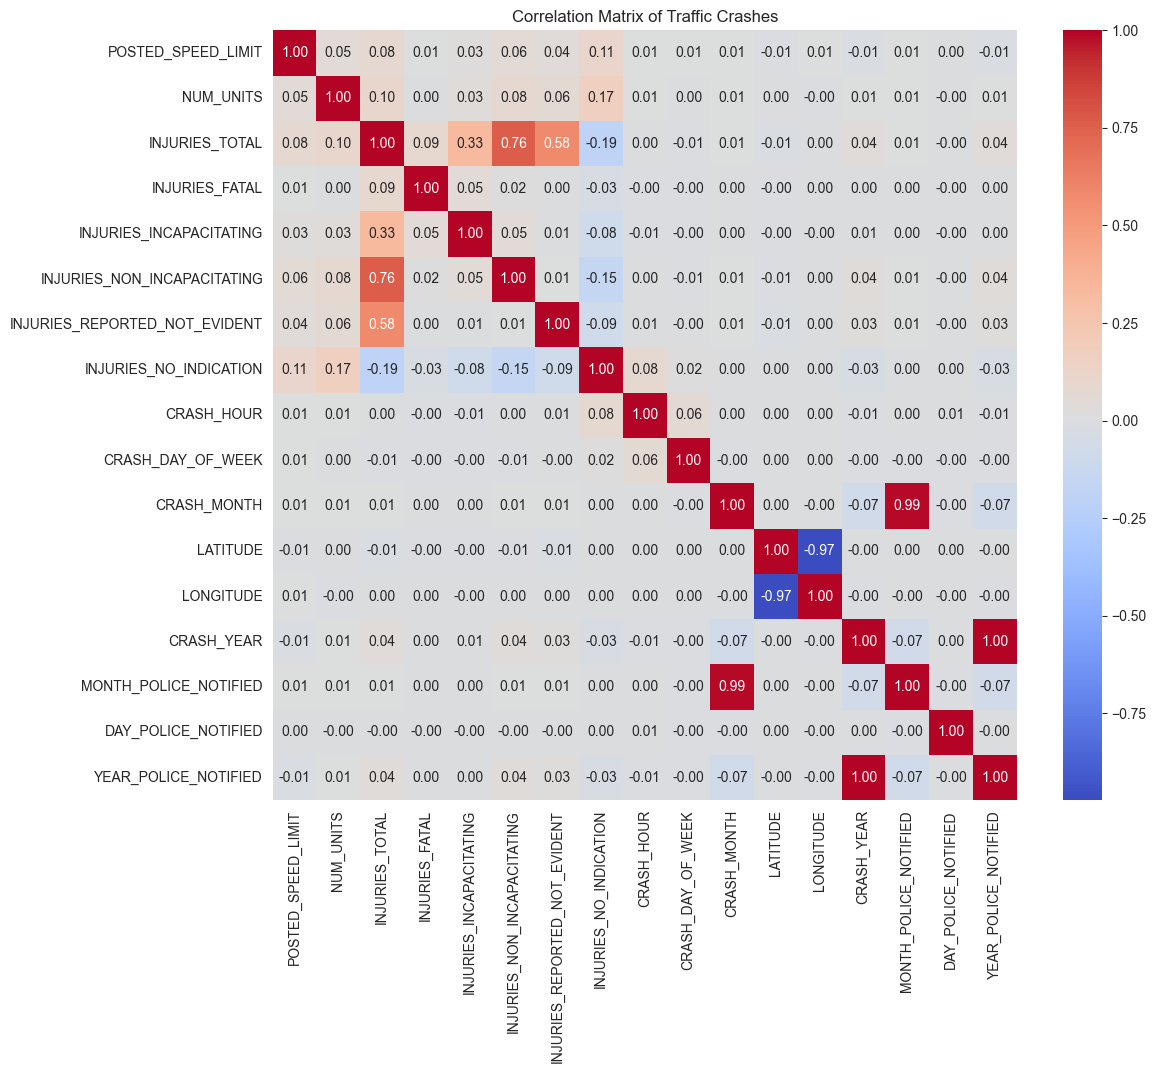

In [37]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
correlation_matrix= df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Traffic Crashes')
plt.show()

There's no correlation between important variables

#### TRAFFIC CRASH LOCATION VISUALIZATION

Let’s see the cases localization on the map; we could find some features from this visualization

If all data is included, the system will collapse, so we have to extract some data for the visualization and drop NaN values:

In [38]:
df_map_vis= df[['LATITUDE', 'LONGITUDE']].sample(3500).reset_index(drop=True)

In [39]:
df_map_vis.isna().sum()

LATITUDE     0
LONGITUDE    0
dtype: int64

In [40]:
connect_map = folium.Map(location=[41.881832, -87.623177], zoom_start=11)

ubication_map = folium.map.FeatureGroup()

for lat, lon in zip(df_map_vis['LATITUDE'], df_map_vis['LONGITUDE']):
  folium.CircleMarker(location=[lat, lon], radius=6, color='cornflowerblue', fill=True, fill_color='blue').add_to(connect_map)

connect_map.add_child(ubication_map)

connect_map


Nothing to report, only there are some cases outside the urban perimeter, but they're around the airports.

### CLEAN COLUMNS FOR ML MODELING

Let's drop columns that don't add value and save the dataset for ML classification modeling.

In [41]:
df.drop(columns=['POSTED_SPEED_LIMIT','WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                 'NUM_UNITS', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_MONTH', 'CRASH_YEAR', 'YEAR_POLICE_NOTIFIED'], inplace =True)


In [42]:
df.shape

(862214, 22)

Let's save the dataset:

In [44]:
project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(project_dir, "data", "processed")
os.makedirs(data_dir, exist_ok=True)

output_path = os.path.join(data_dir, 'traffic_crashes_for_ml.csv')
df.to_csv(output_path, index=False)